## Preprocessing

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import folium

from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [3]:
df= pd.read_csv('data/KoreaForeignData.csv')
df

동별(1)  동별(2)  동별(3) 2016 1/4 2016 1/4.1 2016 1/4.2 2016 1/4.3 2016 1/4.4  \
0    동별(1)  동별(2)  동별(3)       합계         합계         합계         합계         합계   
1    동별(1)  동별(2)  동별(3)       소계         중국         중국         중국         미국   
2    동별(1)  동별(2)  동별(3)       소계         소계    한국계 중국인        중국인         소계   
3    동별(1)  동별(2)  동별(3)        계          계          계          계          계   
4       합계     소계     소계   273233     196181     138957      57224       9242   
..     ...    ...    ...      ...        ...        ...        ...        ...   
447     합계    강동구   둔촌1동       55         16          8          8          5   
448     합계    강동구   둔촌2동      137         78         65         13          1   
449     합계    강동구   암사1동      403        284        224         60          7   
450     합계    강동구   천호2동      826        696        568        128         11   
451     합계    강동구     길동      359        214        158         56         15   

    2016 1/4.5 2016 1/4.6  ... 2016 1/4.8 2016 1/4.9 2016 1/4.10 2016 1/4.11  \
0           합계         합계  ...         합계         합계          합계          합계   
1          타이완         일본  ...         몽골        필리핀         캐나다         우즈벡   
2           소계         소계  ...         소계         소계          소계          소계   
3            계          계  ...          계          계           계           계   
4         8664       8191  ...       5189       3665        1777        1954   
..         ...        ...  ...        ...        ...         ...         ...   
447          4          2  ...          -          2           -           -   
448          2          7  ...          -          3           1           3   
449          9         15  ...         11          6           4           2   
450         10          6  ...         22         15           1           2   
451          7         13  ...         24         14           2           8   

    2016 1/4.12 2016 1/4.13 2016 1/4.14 2016 1/4.15 2016 1/4.16 2016 1/4.17  
0            합계          합계          합계          합계          합계          합계  
1           러시아          인도          타이          영국         프랑스   기       타  
2            소계          소계          소계          소계          소계          소계  
3             계           계           계           계           계           계  
4          1431        1898        1292        1470        2044       21527  
..          ...         ...         ...         ...         ...         ...  
447           -           -           4           -           -          21  
448           2           -           -           3           1          28  
449           5           1           3           1           1          13  
450           1           2           -           5           -          18  
451           -           2           2           3           1         NaN  

[452 rows x 21 columns]

In [61]:
#df.describe()

동별(3) 2016 1/4 2016 1/4.1 2016 1/4.2 2016 1/4.3 2016 1/4.4 2016 1/4.5  \
count     422      422        422        422        422        422        422   
unique    422      338        302        254        201         77         69   
top     동별(3)      231         93         25         28          8          3   
freq        1        5          5          7          9         30         32   

       2016 1/4.6 2016 1/4.7  2016 1/4.8 2016 1/4.9  2016 1/4.10  2016 1/4.11  \
count         422        422         422        422          422          422   
unique         66         72          64         42           29           31   
top             6         17           0          3            0            0   
freq           39         22          81         49           93          108   

        2016 1/4.12  2016 1/4.13  2016 1/4.14  2016 1/4.15  2016 1/4.16  \
count           422          422          422          422          422   
unique           29           42           27           31           37   
top               0            0            0            0            0   
freq            136          208          111          147          177   

       2016 1/4.17  
count          421  
unique         118  
top              7  
freq            17

In [4]:
#drop unneeded columns
df= df.drop(df.columns[[0,1]],axis=1)
df.head()

동별(3) 2016 1/4 2016 1/4.1 2016 1/4.2 2016 1/4.3 2016 1/4.4 2016 1/4.5  \
0  동별(3)       합계         합계         합계         합계         합계         합계   
1  동별(3)       소계         중국         중국         중국         미국        타이완   
2  동별(3)       소계         소계    한국계 중국인        중국인         소계         소계   
3  동별(3)        계          계          계          계          계          계   
4     소계   273233     196181     138957      57224       9242       8664   

  2016 1/4.6 2016 1/4.7 2016 1/4.8 2016 1/4.9 2016 1/4.10 2016 1/4.11  \
0         합계         합계         합계         합계          합계          합계   
1         일본        베트남         몽골        필리핀         캐나다         우즈벡   
2         소계         소계         소계         소계          소계          소계   
3          계          계          계          계           계           계   
4       8191       8708       5189       3665        1777        1954   

  2016 1/4.12 2016 1/4.13 2016 1/4.14 2016 1/4.15 2016 1/4.16 2016 1/4.17  
0          합계          합계          합계          합계          합계          합계  
1         러시아          인도          타이          영국         프랑스   기       타  
2          소계          소계          소계          소계          소계          소계  
3           계           계           계           계           계           계  
4        1431        1898        1292        1470        2044       21527

In [5]:
#drop unneeded index
df= df.drop(df.index[[0,2,3,4,5]])
df.head()

동별(3) 2016 1/4 2016 1/4.1 2016 1/4.2 2016 1/4.3 2016 1/4.4 2016 1/4.5  \
1  동별(3)       소계         중국         중국         중국         미국        타이완   
6    사직동      336        109         21         88         35         12   
7    삼청동      201         35         23         12          7          4   
8    부암동      428        301         19        282         11         10   
9    평창동      196         32          7         25         51         15   

  2016 1/4.6 2016 1/4.7 2016 1/4.8 2016 1/4.9 2016 1/4.10 2016 1/4.11  \
1         일본        베트남         몽골        필리핀         캐나다         우즈벡   
6         24          3          -         11           7           3   
7          2        103          -          2           -           -   
8          9         12          2          2           1           -   
9         10          5          1         16           6           2   

  2016 1/4.12 2016 1/4.13 2016 1/4.14 2016 1/4.15 2016 1/4.16 2016 1/4.17  
1         러시아          인도          타이          영국         프랑스   기       타  
6          18          10           3           5          21          75  
7           -           -           -           3           3          42  
8           4           -          15           3           6          52  
9           1           4           1           9          16          27

In [6]:
#drop unneded data
index = df[df['동별(3)']=='소계'].index
df = df.drop(index)
df

동별(3) 2016 1/4 2016 1/4.1 2016 1/4.2 2016 1/4.3 2016 1/4.4 2016 1/4.5  \
1    동별(3)       소계         중국         중국         중국         미국        타이완   
6      사직동      336        109         21         88         35         12   
7      삼청동      201         35         23         12          7          4   
8      부암동      428        301         19        282         11         10   
9      평창동      196         32          7         25         51         15   
..     ...      ...        ...        ...        ...        ...        ...   
447   둔촌1동       55         16          8          8          5          4   
448   둔촌2동      137         78         65         13          1          2   
449   암사1동      403        284        224         60          7          9   
450   천호2동      826        696        568        128         11         10   
451     길동      359        214        158         56         15          7   

    2016 1/4.6 2016 1/4.7 2016 1/4.8 2016 1/4.9 2016 1/4.10 2016 1/4.11  \
1           일본        베트남         몽골        필리핀         캐나다         우즈벡   
6           24          3          -         11           7           3   
7            2        103          -          2           -           -   
8            9         12          2          2           1           -   
9           10          5          1         16           6           2   
..         ...        ...        ...        ...         ...         ...   
447          2          1          -          2           -           -   
448          7          8          -          3           1           3   
449         15         41         11          6           4           2   
450          6         37         22         15           1           2   
451         13         26         24         14           2           8   

    2016 1/4.12 2016 1/4.13 2016 1/4.14 2016 1/4.15 2016 1/4.16 2016 1/4.17  
1           러시아          인도          타이          영국         프랑스   기       타  
6            18          10           3           5          21          75  
7             -           -           -           3           3          42  
8             4           -          15           3           6          52  
9             1           4           1           9          16          27  
..          ...         ...         ...         ...         ...         ...  
447           -           -           4           -           -          21  
448           2           -           -           3           1          28  
449           5           1           3           1           1          13  
450           1           2           -           5           -          18  
451           -           2           2           3           1         NaN  

[423 rows x 19 columns]

In [8]:
index2 = df[df['동별(3)']=='둔촌1동'].index
df = df.drop(index2)
df

동별(3) 2016 1/4 2016 1/4.1 2016 1/4.2 2016 1/4.3 2016 1/4.4 2016 1/4.5  \
1    동별(3)       소계         중국         중국         중국         미국        타이완   
6      사직동      336        109         21         88         35         12   
7      삼청동      201         35         23         12          7          4   
8      부암동      428        301         19        282         11         10   
9      평창동      196         32          7         25         51         15   
..     ...      ...        ...        ...        ...        ...        ...   
446   성내3동      258        156         99         57         32          4   
448   둔촌2동      137         78         65         13          1          2   
449   암사1동      403        284        224         60          7          9   
450   천호2동      826        696        568        128         11         10   
451     길동      359        214        158         56         15          7   

    2016 1/4.6 2016 1/4.7 2016 1/4.8 2016 1/4.9 2016 1/4.10 2016 1/4.11  \
1           일본        베트남         몽골        필리핀         캐나다         우즈벡   
6           24          3          -         11           7           3   
7            2        103          -          2           -           -   
8            9         12          2          2           1           -   
9           10          5          1         16           6           2   
..         ...        ...        ...        ...         ...         ...   
446         14         18          2          4           7           -   
448          7          8          -          3           1           3   
449         15         41         11          6           4           2   
450          6         37         22         15           1           2   
451         13         26         24         14           2           8   

    2016 1/4.12 2016 1/4.13 2016 1/4.14 2016 1/4.15 2016 1/4.16 2016 1/4.17  
1           러시아          인도          타이          영국         프랑스   기       타  
6            18          10           3           5          21          75  
7             -           -           -           3           3          42  
8             4           -          15           3           6          52  
9             1           4           1           9          16          27  
..          ...         ...         ...         ...         ...         ...  
446           1           -           2           -           -          18  
448           2           -           -           3           1          28  
449           5           1           3           1           1          13  
450           1           2           -           5           -          18  
451           -           2           2           3           1         NaN  

[422 rows x 19 columns]

In [7]:
#handle null data
df=df.replace('-',0)
df.head()

동별(3) 2016 1/4 2016 1/4.1 2016 1/4.2 2016 1/4.3 2016 1/4.4 2016 1/4.5  \
1  동별(3)       소계         중국         중국         중국         미국        타이완   
6    사직동      336        109         21         88         35         12   
7    삼청동      201         35         23         12          7          4   
8    부암동      428        301         19        282         11         10   
9    평창동      196         32          7         25         51         15   

  2016 1/4.6 2016 1/4.7 2016 1/4.8 2016 1/4.9 2016 1/4.10 2016 1/4.11  \
1         일본        베트남         몽골        필리핀         캐나다         우즈벡   
6         24          3          0         11           7           3   
7          2        103          0          2           0           0   
8          9         12          2          2           1           0   
9         10          5          1         16           6           2   

  2016 1/4.12 2016 1/4.13 2016 1/4.14 2016 1/4.15 2016 1/4.16 2016 1/4.17  
1         러시아          인도          타이          영국         프랑스   기       타  
6          18          10           3           5          21          75  
7           0           0           0           3           3          42  
8           4           0          15           3           6          52  
9           1           4           1           9          16          27

In [8]:
#drop unneeded columns for calculating the percentage of foriegn
df_percent = df.copy()
df_percent=df_percent.drop(df_percent.columns[[0]],axis=1)
df_percent.head()

2016 1/4 2016 1/4.1 2016 1/4.2 2016 1/4.3 2016 1/4.4 2016 1/4.5 2016 1/4.6  \
1       소계         중국         중국         중국         미국        타이완         일본   
6      336        109         21         88         35         12         24   
7      201         35         23         12          7          4          2   
8      428        301         19        282         11         10          9   
9      196         32          7         25         51         15         10   

  2016 1/4.7 2016 1/4.8 2016 1/4.9 2016 1/4.10 2016 1/4.11 2016 1/4.12  \
1        베트남         몽골        필리핀         캐나다         우즈벡         러시아   
6          3          0         11           7           3          18   
7        103          0          2           0           0           0   
8         12          2          2           1           0           4   
9          5          1         16           6           2           1   

  2016 1/4.13 2016 1/4.14 2016 1/4.15 2016 1/4.16 2016 1/4.17  
1          인도          타이          영국         프랑스   기       타  
6          10           3           5          21          75  
7           0           0           3           3          42  
8           0          15           3           6          52  
9           4           1           9          16          27

In [9]:
#drop unneeded index (name of country)
df_percent= df_percent.drop(df_percent.index[[0]])
df_percent.head()

2016 1/4 2016 1/4.1 2016 1/4.2 2016 1/4.3 2016 1/4.4 2016 1/4.5 2016 1/4.6  \
6       336        109         21         88         35         12         24   
7       201         35         23         12          7          4          2   
8       428        301         19        282         11         10          9   
9       196         32          7         25         51         15         10   
10       77         47         14         33          4         12          3   

   2016 1/4.7 2016 1/4.8 2016 1/4.9 2016 1/4.10 2016 1/4.11 2016 1/4.12  \
6           3          0         11           7           3          18   
7         103          0          2           0           0           0   
8          12          2          2           1           0           4   
9           5          1         16           6           2           1   
10          2          1          2           2           0           0   

   2016 1/4.13 2016 1/4.14 2016 1/4.15 2016 1/4.16 2016 1/4.17  
6           10           3           5          21          75  
7            0           0           3           3          42  
8            0          15           3           6          52  
9            4           1           9          16          27  
10           0           0           0           0           4

In [10]:
#change to float type
df_percent=df_percent.astype('float')
df_percent.head()

2016 1/4  2016 1/4.1  2016 1/4.2  2016 1/4.3  2016 1/4.4  2016 1/4.5  \
6      336.0       109.0        21.0        88.0        35.0        12.0   
7      201.0        35.0        23.0        12.0         7.0         4.0   
8      428.0       301.0        19.0       282.0        11.0        10.0   
9      196.0        32.0         7.0        25.0        51.0        15.0   
10      77.0        47.0        14.0        33.0         4.0        12.0   

    2016 1/4.6  2016 1/4.7  2016 1/4.8  2016 1/4.9  2016 1/4.10  2016 1/4.11  \
6         24.0         3.0         0.0        11.0          7.0          3.0   
7          2.0       103.0         0.0         2.0          0.0          0.0   
8          9.0        12.0         2.0         2.0          1.0          0.0   
9         10.0         5.0         1.0        16.0          6.0          2.0   
10         3.0         2.0         1.0         2.0          2.0          0.0   

    2016 1/4.12  2016 1/4.13  2016 1/4.14  2016 1/4.15  2016 1/4.16  \
6          18.0         10.0          3.0          5.0         21.0   
7           0.0          0.0          0.0          3.0          3.0   
8           4.0          0.0         15.0          3.0          6.0   
9           1.0          4.0          1.0          9.0         16.0   
10          0.0          0.0          0.0          0.0          0.0   

    2016 1/4.17  
6          75.0  
7          42.0  
8          52.0  
9          27.0  
10          4.0

In [11]:
#Total number and the number of each foreign in specific Dong 

df_percent['Chinese'] = df_percent.iloc[:,1]
df_percent['Japanese'] = df_percent.iloc[:,6]
df_percent['Asian']= df_percent.iloc[:,5]+df_percent.iloc[:,7] + df_percent.iloc[:,8] + df_percent.iloc[:,9]+ df_percent.iloc[:,11]+ df_percent.iloc[:,13] + df_percent.iloc[:,14]
df_percent['Westerner']=df_percent.iloc[:,4] + df_percent.iloc[:,10] + df_percent.iloc[:,12]+ df_percent.iloc[:,15]+df_percent.iloc[:,16]
df_percent['Total'] = df_percent['Chinese']+df_percent['Japanese']+df_percent['Asian']+df_percent['Westerner']


df_percent.head()

2016 1/4  2016 1/4.1  2016 1/4.2  2016 1/4.3  2016 1/4.4  2016 1/4.5  \
6      336.0       109.0        21.0        88.0        35.0        12.0   
7      201.0        35.0        23.0        12.0         7.0         4.0   
8      428.0       301.0        19.0       282.0        11.0        10.0   
9      196.0        32.0         7.0        25.0        51.0        15.0   
10      77.0        47.0        14.0        33.0         4.0        12.0   

    2016 1/4.6  2016 1/4.7  2016 1/4.8  2016 1/4.9  ...  2016 1/4.13  \
6         24.0         3.0         0.0        11.0  ...         10.0   
7          2.0       103.0         0.0         2.0  ...          0.0   
8          9.0        12.0         2.0         2.0  ...          0.0   
9         10.0         5.0         1.0        16.0  ...          4.0   
10         3.0         2.0         1.0         2.0  ...          0.0   

    2016 1/4.14  2016 1/4.15  2016 1/4.16  2016 1/4.17  Chinese  Japanese  \
6           3.0          5.0         21.0         75.0    109.0      24.0   
7           0.0          3.0          3.0         42.0     35.0       2.0   
8          15.0          3.0          6.0         52.0    301.0       9.0   
9           1.0          9.0         16.0         27.0     32.0      10.0   
10          0.0          0.0          0.0          4.0     47.0       3.0   

    Asian  Westerner  Total  
6    42.0       86.0  261.0  
7   109.0       13.0  159.0  
8    41.0       25.0  376.0  
9    44.0       83.0  169.0  
10   17.0        6.0   73.0  

[5 rows x 23 columns]

In [12]:
#Use only needed columns
df_1=df_percent.copy()[['Total','Chinese','Japanese','Asian','Westerner']]
df_1.head()

Total  Chinese  Japanese  Asian  Westerner
6   261.0    109.0      24.0   42.0       86.0
7   159.0     35.0       2.0  109.0       13.0
8   376.0    301.0       9.0   41.0       25.0
9   169.0     32.0      10.0   44.0       83.0
10   73.0     47.0       3.0   17.0        6.0

In [13]:
#Calculate percentage per foreign 
df_1['Percentage of Chinese']= df_1['Chinese'] / df_1['Total'] 
df_1['Percentage of Japanese'] = df_1['Japanese'] / df_1['Total'] 
df_1['Percentage of Asian']= df_1['Asian'] / df_1['Total'] 
df_1['Percentage of Westerner']= df_1['Westerner'] / df_1['Total'] 

df_1

Total  Chinese  Japanese  Asian  Westerner  Percentage of Chinese  \
6    261.0    109.0      24.0   42.0       86.0               0.417625   
7    159.0     35.0       2.0  109.0       13.0               0.220126   
8    376.0    301.0       9.0   41.0       25.0               0.800532   
9    169.0     32.0      10.0   44.0       83.0               0.189349   
10    73.0     47.0       3.0   17.0        6.0               0.643836   
..     ...      ...       ...    ...        ...                    ...   
447   34.0     16.0       2.0   11.0        5.0               0.470588   
448  109.0     78.0       7.0   16.0        8.0               0.715596   
449  390.0    284.0      15.0   73.0       18.0               0.728205   
450  808.0    696.0       6.0   88.0       18.0               0.861386   
451  331.0    214.0      13.0   83.0       21.0               0.646526   

     Percentage of Japanese  Percentage of Asian  Percentage of Westerner  
6                  0.091954             0.160920                 0.329502  
7                  0.012579             0.685535                 0.081761  
8                  0.023936             0.109043                 0.066489  
9                  0.059172             0.260355                 0.491124  
10                 0.041096             0.232877                 0.082192  
..                      ...                  ...                      ...  
447                0.058824             0.323529                 0.147059  
448                0.064220             0.146789                 0.073394  
449                0.038462             0.187179                 0.046154  
450                0.007426             0.108911                 0.022277  
451                0.039275             0.250755                 0.063444  

[422 rows x 9 columns]

In [14]:
#Use only needed columns
df_1= df_1[['Percentage of Chinese','Percentage of Japanese','Percentage of Asian','Percentage of Westerner']]
df_1

Percentage of Chinese  Percentage of Japanese  Percentage of Asian  \
6                 0.417625                0.091954             0.160920   
7                 0.220126                0.012579             0.685535   
8                 0.800532                0.023936             0.109043   
9                 0.189349                0.059172             0.260355   
10                0.643836                0.041096             0.232877   
..                     ...                     ...                  ...   
447               0.470588                0.058824             0.323529   
448               0.715596                0.064220             0.146789   
449               0.728205                0.038462             0.187179   
450               0.861386                0.007426             0.108911   
451               0.646526                0.039275             0.250755   

     Percentage of Westerner  
6                   0.329502  
7                   0.081761  
8                   0.066489  
9                   0.491124  
10                  0.082192  
..                       ...  
447                 0.147059  
448                 0.073394  
449                 0.046154  
450                 0.022277  
451                 0.063444  

[422 rows x 4 columns]

In [15]:
#reset index
df_1.reset_index(drop=True,inplace=True)
df_1.head()

Percentage of Chinese  Percentage of Japanese  Percentage of Asian  \
0               0.417625                0.091954             0.160920   
1               0.220126                0.012579             0.685535   
2               0.800532                0.023936             0.109043   
3               0.189349                0.059172             0.260355   
4               0.643836                0.041096             0.232877   

   Percentage of Westerner  
0                 0.329502  
1                 0.081761  
2                 0.066489  
3                 0.491124  
4                 0.082192

In [16]:
#use only dong information
df_dong=df.copy()[['동별(3)']]
df_dong=df_dong.drop(df_dong.index[[0]])
df_dong.rename(columns = {'동별(3)':'dong'},inplace=True)
df_dong

dong
6     사직동
7     삼청동
8     부암동
9     평창동
10    무악동
..    ...
447  둔촌1동
448  둔촌2동
449  암사1동
450  천호2동
451    길동

[422 rows x 1 columns]

In [17]:
#reset index
df_dong.reset_index(drop=True,inplace=True)
df_dong

dong
0     사직동
1     삼청동
2     부암동
3     평창동
4     무악동
..    ...
417  둔촌1동
418  둔촌2동
419  암사1동
420  천호2동
421    길동

[422 rows x 1 columns]

In [18]:
#merge dong and foreign percentage data
KoreaForeign= pd.concat([df_dong,df_1],axis=1)
KoreaForeign

dong  Percentage of Chinese  Percentage of Japanese  Percentage of Asian  \
0     사직동               0.417625                0.091954             0.160920   
1     삼청동               0.220126                0.012579             0.685535   
2     부암동               0.800532                0.023936             0.109043   
3     평창동               0.189349                0.059172             0.260355   
4     무악동               0.643836                0.041096             0.232877   
..    ...                    ...                     ...                  ...   
417  둔촌1동               0.470588                0.058824             0.323529   
418  둔촌2동               0.715596                0.064220             0.146789   
419  암사1동               0.728205                0.038462             0.187179   
420  천호2동               0.861386                0.007426             0.108911   
421    길동               0.646526                0.039275             0.250755   

     Percentage of Westerner  
0                   0.329502  
1                   0.081761  
2                   0.066489  
3                   0.491124  
4                   0.082192  
..                       ...  
417                 0.147059  
418                 0.073394  
419                 0.046154  
420                 0.022277  
421                 0.063444  

[422 rows x 5 columns]

In [19]:
#sort values according to ㄱ,ㄴ,ㄷ,...
KoreaForeign = KoreaForeign.sort_values(by=['dong'])
KoreaForeign

dong  Percentage of Chinese  Percentage of Japanese  Percentage of Asian  \
393  가락1동               0.894737                0.052632             0.000000   
394  가락2동               0.813084                0.032710             0.102804   
392  가락본동               0.845178                0.027919             0.071066   
272  가리봉동               0.992152                0.000406             0.006631   
275   가산동               0.954210                0.002708             0.041605   
..    ...                    ...                     ...                  ...   
36    효창동               0.436620                0.077465             0.246479   
32    후암동               0.565574                0.049180             0.157787   
81   휘경1동               0.722430                0.041121             0.214019   
82   휘경2동               0.670300                0.040872             0.258856   
315   흑석동               0.828493                0.012603             0.106849   

     Percentage of Westerner  
393                 0.052632  
394                 0.051402  
392                 0.055838  
272                 0.000812  
275                 0.001477  
..                       ...  
36                  0.239437  
32                  0.227459  
81                  0.022430  
82                  0.029973  
315                 0.052055  

[422 rows x 5 columns]

In [20]:
KoreaForeign.reset_index(drop=True,inplace=True)
KoreaForeign

dong  Percentage of Chinese  Percentage of Japanese  Percentage of Asian  \
0    가락1동               0.894737                0.052632             0.000000   
1    가락2동               0.813084                0.032710             0.102804   
2    가락본동               0.845178                0.027919             0.071066   
3    가리봉동               0.992152                0.000406             0.006631   
4     가산동               0.954210                0.002708             0.041605   
..    ...                    ...                     ...                  ...   
417   효창동               0.436620                0.077465             0.246479   
418   후암동               0.565574                0.049180             0.157787   
419  휘경1동               0.722430                0.041121             0.214019   
420  휘경2동               0.670300                0.040872             0.258856   
421   흑석동               0.828493                0.012603             0.106849   

     Percentage of Westerner  
0                   0.052632  
1                   0.051402  
2                   0.055838  
3                   0.000812  
4                   0.001477  
..                       ...  
417                 0.239437  
418                 0.227459  
419                 0.022430  
420                 0.029973  
421                 0.052055  

[422 rows x 5 columns]

In [21]:
#Load restaurant information
df2 = pd.read_csv('data/KoreaRestaurantData.csv')
df2

상가업소번호         상호명     지점명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드    상권업종중분류명  \
0       23324279       제중건강원     NaN         D       소매       D10     건강/미용식품   
1       24525909       민속악기사     NaN         D       소매       D04   취미/오락관련소매   
2       24715368       태평양진주     NaN         D       소매       D26    시계/귀금속소매   
3       15554136  김선희꼼꼼국어교습소     NaN         R    학문/교육       R01   학원-보습교습입시   
4       17174175         비지트     NaN         Q       음식       Q01          한식   
...          ...         ...     ...       ...      ...       ...         ...   
361485  18770336       밀스튜디오     NaN         D       소매       D05        의복의류   
361486  18773993       챔프컴퍼니     NaN         Q       음식       Q01          한식   
361487  18765728         제라클     NaN         D       소매       D06  가방/신발/액세서리   
361488  18764585  아이에스에이주차타워     NaN         F    생활서비스       F14     자동차/이륜차   
361489  18749317        링키영어  서울동부지사         D       소매       D13     책/서적/도서   

       상권업종소분류코드   상권업종소분류명 표준산업분류코드  ...                     건물관리번호  \
0         D10A07        건강원   G47216  ...  1156010600100410002034626   
1         D04A09       악기판매   G47593  ...  1120012200101420011000227   
2         D26A01     시계/귀금속   G47830  ...  1111015200100440000000001   
3         R01A01      학원-입시   P85501  ...  1171011100101970003017195   
4         Q01A01  한식/백반/한정식   I56111  ...  1165010100108540018009586   
...          ...        ...      ...  ...                        ...   
361485    D05A03    여성의류전문점      NaN  ...  1150010200106390011027411   
361486    Q01A01  한식/백반/한정식   I56111  ...  1165010100109380024014572   
361487    D06A05     액세서리판매   G47419  ...  1165010200100820018005578   
361488    F14A07      주차장운영   H52915  ...  1168010700106000001026870   
361489    D13A01         서점   G47611  ...  1174010100102700000019509   

                 건물명                              도로명주소   구우편번호 신우편번호  동정보  \
0                NaN  서울특별시 영등포구 영중로14길 11-17, (영등포동5가)  150030  7250  NaN   
1                NaN            서울특별시 성동구 용답5길 2, (용답동)  133849  4803  NaN   
2             금사랑투빌딩        서울특별시 종로구 서순라길 17-10, (봉익동)  110390  3138  NaN   
3                NaN       서울특별시 송파구 위례성대로12길 31, (방이동)  138834  5640  NaN   
4              상랑의빌딩         서울특별시 서초구 동광로18길 82, (방배동)  137837  6572  NaN   
...              ...                                ...     ...   ...  ...   
361485  홈플러스강서점앤본사사옥           서울특별시 강서구 화곡로 398, (등촌동)  157840  7567  NaN   
361486           NaN       서울특별시 서초구 방배로23길 32-4, (방배동)  137844  6673  NaN   
361487          대산주택         서울특별시 서초구 논현로27길 74, (양재동)  137890  6747  NaN   
361488         ISA빌딩        서울특별시 강남구 압구정로30길 51, (신사동)  135893  6025  NaN   
361489          삼익맨션     서울특별시 강동구 상암로 225, (명일동, 삼익맨션)  134780  5297    3   

        층정보  호정보          경도         위도  
0         1  NaN  126.907168  37.520613  
1       NaN  NaN  127.049018  37.566857  
2       NaN  NaN  126.993530  37.571848  
3         2  NaN  127.121520  37.510967  
4         1  NaN  126.991394  37.488375  
...     ...  ...         ...        ...  
361485    1  NaN  126.854800  37.558456  
361486    1  NaN  126.992590  37.486042  
361487  NaN  NaN  127.040527  37.478638  
361488  NaN  NaN  127.029347  37.523924  
361489  NaN  NaN  127.147496  37.547299  

[361490 rows x 39 columns]

In [22]:
#use only needed columns
df2=df2.copy()[['상권업종중분류명','상권업종소분류명','행정동명','경도','위도']]
df2

상권업종중분류명   상권업종소분류명         행정동명          경도         위도
0          건강/미용식품        건강원         영등포동  126.907168  37.520613
1        취미/오락관련소매       악기판매          용답동  127.049018  37.566857
2         시계/귀금속소매     시계/귀금속  종로1.2.3.4가동  126.993530  37.571848
3        학원-보습교습입시      학원-입시         방이1동  127.121520  37.510967
4               한식  한식/백반/한정식         방배4동  126.991394  37.488375
...            ...        ...          ...         ...        ...
361485        의복의류    여성의류전문점         등촌1동  126.854800  37.558456
361486          한식  한식/백반/한정식         방배1동  126.992590  37.486042
361487  가방/신발/액세서리     액세서리판매         양재1동  127.040527  37.478638
361488     자동차/이륜차      주차장운영         압구정동  127.029347  37.523924
361489     책/서적/도서         서점         명일1동  127.147496  37.547299

[361490 rows x 5 columns]

In [23]:
#drop null data, but there is no null data
df2.dropna()

상권업종중분류명   상권업종소분류명         행정동명          경도         위도
0          건강/미용식품        건강원         영등포동  126.907168  37.520613
1        취미/오락관련소매       악기판매          용답동  127.049018  37.566857
2         시계/귀금속소매     시계/귀금속  종로1.2.3.4가동  126.993530  37.571848
3        학원-보습교습입시      학원-입시         방이1동  127.121520  37.510967
4               한식  한식/백반/한정식         방배4동  126.991394  37.488375
...            ...        ...          ...         ...        ...
361485        의복의류    여성의류전문점         등촌1동  126.854800  37.558456
361486          한식  한식/백반/한정식         방배1동  126.992590  37.486042
361487  가방/신발/액세서리     액세서리판매         양재1동  127.040527  37.478638
361488     자동차/이륜차      주차장운영         압구정동  127.029347  37.523924
361489     책/서적/도서         서점         명일1동  127.147496  37.547299

[361490 rows x 5 columns]

In [24]:
# set the dong name same with foreign dataset 
df2.loc[df2['행정동명'].str.contains('상일1동'),'행정동명']='상일동'
df2.loc[df2['행정동명'].str.contains('상일2동'),'행정동명']='상일동'

df2

상권업종중분류명   상권업종소분류명         행정동명          경도         위도
0          건강/미용식품        건강원         영등포동  126.907168  37.520613
1        취미/오락관련소매       악기판매          용답동  127.049018  37.566857
2         시계/귀금속소매     시계/귀금속  종로1.2.3.4가동  126.993530  37.571848
3        학원-보습교습입시      학원-입시         방이1동  127.121520  37.510967
4               한식  한식/백반/한정식         방배4동  126.991394  37.488375
...            ...        ...          ...         ...        ...
361485        의복의류    여성의류전문점         등촌1동  126.854800  37.558456
361486          한식  한식/백반/한정식         방배1동  126.992590  37.486042
361487  가방/신발/액세서리     액세서리판매         양재1동  127.040527  37.478638
361488     자동차/이륜차      주차장운영         압구정동  127.029347  37.523924
361489     책/서적/도서         서점         명일1동  127.147496  37.547299

[361490 rows x 5 columns]

In [25]:
#this is dong is not in the foreign dataset, so drop this 
df_i = df2[(df2['행정동명'] == '항동')|(df2['행정동명'] == '위례동')].index
df2=df2.drop(df_i)
df2

상권업종중분류명   상권업종소분류명         행정동명          경도         위도
0          건강/미용식품        건강원         영등포동  126.907168  37.520613
1        취미/오락관련소매       악기판매          용답동  127.049018  37.566857
2         시계/귀금속소매     시계/귀금속  종로1.2.3.4가동  126.993530  37.571848
3        학원-보습교습입시      학원-입시         방이1동  127.121520  37.510967
4               한식  한식/백반/한정식         방배4동  126.991394  37.488375
...            ...        ...          ...         ...        ...
361485        의복의류    여성의류전문점         등촌1동  126.854800  37.558456
361486          한식  한식/백반/한정식         방배1동  126.992590  37.486042
361487  가방/신발/액세서리     액세서리판매         양재1동  127.040527  37.478638
361488     자동차/이륜차      주차장운영         압구정동  127.029347  37.523924
361489     책/서적/도서         서점         명일1동  127.147496  37.547299

[360652 rows x 5 columns]

In [26]:
#we use only western, chinese, japanese, asian restaurant 
type = df2['상권업종중분류명'].str.contains("양식|중식|일식/수산물")
type2 = df2['상권업종소분류명'].str.contains("동남아음식전문점")

df2 = df2[type|type2]
df2

상권업종중분류명  상권업종소분류명    행정동명          경도         위도
32           중식  중국음식/중국집    서초4동  127.025310  37.500247
60           양식   패밀리레스토랑    반포4동  127.001978  37.493519
224          양식  정통양식/경양식     신촌동  126.944391  37.564409
295      일식/수산물        횟집    이문2동  127.066818  37.602725
312      일식/수산물    음식점-일식     사직동  126.971740  37.579094
...         ...       ...     ...         ...        ...
361444       중식  중국음식/중국집     군자동  127.069725  37.548424
361453       중식  중국음식/중국집    잠실본동  127.079668  37.510063
361454       양식  정통양식/경양식     한남동  127.001158  37.537222
361459  별식/퓨전요리  동남아음식전문점  성수2가1동  127.055970  37.539800
361470   일식/수산물  음식점-초밥전문    양평2동  126.895956  37.537556

[19669 rows x 5 columns]

In [27]:
df2= df2.drop(['상권업종소분류명'],axis=1)
df2.head()

상권업종중분류명  행정동명          경도         위도
32        중식  서초4동  127.025310  37.500247
60        양식  반포4동  127.001978  37.493519
224       양식   신촌동  126.944391  37.564409
295   일식/수산물  이문2동  127.066818  37.602725
312   일식/수산물   사직동  126.971740  37.579094

In [28]:
df2.reset_index(drop=True,inplace=True)
df2

상권업종중분류명    행정동명          경도         위도
0           중식    서초4동  127.025310  37.500247
1           양식    반포4동  127.001978  37.493519
2           양식     신촌동  126.944391  37.564409
3       일식/수산물    이문2동  127.066818  37.602725
4       일식/수산물     사직동  126.971740  37.579094
...        ...     ...         ...        ...
19664       중식     군자동  127.069725  37.548424
19665       중식    잠실본동  127.079668  37.510063
19666       양식     한남동  127.001158  37.537222
19667  별식/퓨전요리  성수2가1동  127.055970  37.539800
19668   일식/수산물    양평2동  126.895956  37.537556

[19669 rows x 4 columns]

In [29]:
df2.rename(columns = {'상권업종중분류명':'Type of cuisine','행정동명':'dong','경도':'longitude','위도':'latitude'},inplace=True)
df2

Type of cuisine    dong   longitude   latitude
0                  중식    서초4동  127.025310  37.500247
1                  양식    반포4동  127.001978  37.493519
2                  양식     신촌동  126.944391  37.564409
3              일식/수산물    이문2동  127.066818  37.602725
4              일식/수산물     사직동  126.971740  37.579094
...               ...     ...         ...        ...
19664              중식     군자동  127.069725  37.548424
19665              중식    잠실본동  127.079668  37.510063
19666              양식     한남동  127.001158  37.537222
19667         별식/퓨전요리  성수2가1동  127.055970  37.539800
19668          일식/수산물    양평2동  126.895956  37.537556

[19669 rows x 4 columns]

In [30]:
#change to english 
df2['Type of cuisine'] = df2['Type of cuisine'].replace({'중식':'Chinese Restaurant','양식':'Western Restaurant','일식/수산물':'Japanese Restaurant','별식/퓨전요리':'Asian Restaurant'})
df2

Type of cuisine    dong   longitude   latitude
0       Chinese Restaurant    서초4동  127.025310  37.500247
1       Western Restaurant    반포4동  127.001978  37.493519
2       Western Restaurant     신촌동  126.944391  37.564409
3      Japanese Restaurant    이문2동  127.066818  37.602725
4      Japanese Restaurant     사직동  126.971740  37.579094
...                    ...     ...         ...        ...
19664   Chinese Restaurant     군자동  127.069725  37.548424
19665   Chinese Restaurant    잠실본동  127.079668  37.510063
19666   Western Restaurant     한남동  127.001158  37.537222
19667     Asian Restaurant  성수2가1동  127.055970  37.539800
19668  Japanese Restaurant    양평2동  126.895956  37.537556

[19669 rows x 4 columns]

In [31]:
# Make longitude and latitude dataset 
df_longlat=df2.copy()
df_longlat

Type of cuisine    dong   longitude   latitude
0       Chinese Restaurant    서초4동  127.025310  37.500247
1       Western Restaurant    반포4동  127.001978  37.493519
2       Western Restaurant     신촌동  126.944391  37.564409
3      Japanese Restaurant    이문2동  127.066818  37.602725
4      Japanese Restaurant     사직동  126.971740  37.579094
...                    ...     ...         ...        ...
19664   Chinese Restaurant     군자동  127.069725  37.548424
19665   Chinese Restaurant    잠실본동  127.079668  37.510063
19666   Western Restaurant     한남동  127.001158  37.537222
19667     Asian Restaurant  성수2가1동  127.055970  37.539800
19668  Japanese Restaurant    양평2동  126.895956  37.537556

[19669 rows x 4 columns]

In [32]:
#Calculate mean of longitude and latitude by dong
df_longlat=df_longlat.groupby('dong').mean().reset_index()
df_longlat

dong   longitude   latitude
0    가락1동  127.108313  37.494739
1    가락2동  127.132111  37.495387
2    가락본동  127.121324  37.497008
3    가리봉동  126.888582  37.482108
4     가산동  126.885555  37.477689
..    ...         ...        ...
416   효창동  126.961028  37.540797
417   후암동  126.979295  37.548712
418  휘경1동  127.059053  37.590364
419  휘경2동  127.061439  37.588597
420   흑석동  126.961385  37.507197

[421 rows x 3 columns]

In [33]:
#For counting each types of restaurant, add 'num' columns
df2['num']=1
df2

Type of cuisine    dong   longitude   latitude  num
0       Chinese Restaurant    서초4동  127.025310  37.500247    1
1       Western Restaurant    반포4동  127.001978  37.493519    1
2       Western Restaurant     신촌동  126.944391  37.564409    1
3      Japanese Restaurant    이문2동  127.066818  37.602725    1
4      Japanese Restaurant     사직동  126.971740  37.579094    1
...                    ...     ...         ...        ...  ...
19664   Chinese Restaurant     군자동  127.069725  37.548424    1
19665   Chinese Restaurant    잠실본동  127.079668  37.510063    1
19666   Western Restaurant     한남동  127.001158  37.537222    1
19667     Asian Restaurant  성수2가1동  127.055970  37.539800    1
19668  Japanese Restaurant    양평2동  126.895956  37.537556    1

[19669 rows x 5 columns]

In [34]:
df2.reset_index(drop=True,inplace=True)
df2

Type of cuisine    dong   longitude   latitude  num
0       Chinese Restaurant    서초4동  127.025310  37.500247    1
1       Western Restaurant    반포4동  127.001978  37.493519    1
2       Western Restaurant     신촌동  126.944391  37.564409    1
3      Japanese Restaurant    이문2동  127.066818  37.602725    1
4      Japanese Restaurant     사직동  126.971740  37.579094    1
...                    ...     ...         ...        ...  ...
19664   Chinese Restaurant     군자동  127.069725  37.548424    1
19665   Chinese Restaurant    잠실본동  127.079668  37.510063    1
19666   Western Restaurant     한남동  127.001158  37.537222    1
19667     Asian Restaurant  성수2가1동  127.055970  37.539800    1
19668  Japanese Restaurant    양평2동  126.895956  37.537556    1

[19669 rows x 5 columns]

In [35]:
#Counting restaurant number per each dong
df2_1= df2.pivot_table("num", index="dong",columns="Type of cuisine", aggfunc="count")
df2_1

Type of cuisine  Asian Restaurant  Chinese Restaurant  Japanese Restaurant  \
dong                                                                         
가락1동                          NaN                 NaN                 43.0   
가락2동                          NaN                 5.0                 26.0   
가락본동                          2.0                14.0                 54.0   
가리봉동                          NaN                35.0                  3.0   
가산동                           7.0                51.0                 52.0   
...                           ...                 ...                  ...   
효창동                           NaN                 1.0                  3.0   
후암동                           1.0                 3.0                  7.0   
휘경1동                          2.0                 3.0                  8.0   
휘경2동                          NaN                 1.0                  6.0   
흑석동                           2.0                10.0                 22.0   

Type of cuisine  Western Restaurant  
dong                                 
가락1동                            1.0  
가락2동                            7.0  
가락본동                           18.0  
가리봉동                            3.0  
가산동                            42.0  
...                             ...  
효창동                             6.0  
후암동                            12.0  
휘경1동                            3.0  
휘경2동                            5.0  
흑석동                            21.0  

[421 rows x 4 columns]

In [36]:
#delete column name
df2_1.columns.name = ""
df2_1

Asian Restaurant  Chinese Restaurant  Japanese Restaurant  \
dong                                                              
가락1동               NaN                 NaN                 43.0   
가락2동               NaN                 5.0                 26.0   
가락본동               2.0                14.0                 54.0   
가리봉동               NaN                35.0                  3.0   
가산동                7.0                51.0                 52.0   
...                ...                 ...                  ...   
효창동                NaN                 1.0                  3.0   
후암동                1.0                 3.0                  7.0   
휘경1동               2.0                 3.0                  8.0   
휘경2동               NaN                 1.0                  6.0   
흑석동                2.0                10.0                 22.0   

      Western Restaurant  
dong                      
가락1동                 1.0  
가락2동                 7.0  
가락본동                18.0  
가리봉동                 3.0  
가산동                 42.0  
...                  ...  
효창동                  6.0  
후암동                 12.0  
휘경1동                 3.0  
휘경2동                 5.0  
흑석동                 21.0  

[421 rows x 4 columns]

In [37]:
#reset index 
df2_1=df2_1.reset_index()
df2_1

dong  Asian Restaurant  Chinese Restaurant  Japanese Restaurant  \
0    가락1동               NaN                 NaN                 43.0   
1    가락2동               NaN                 5.0                 26.0   
2    가락본동               2.0                14.0                 54.0   
3    가리봉동               NaN                35.0                  3.0   
4     가산동               7.0                51.0                 52.0   
..    ...               ...                 ...                  ...   
416   효창동               NaN                 1.0                  3.0   
417   후암동               1.0                 3.0                  7.0   
418  휘경1동               2.0                 3.0                  8.0   
419  휘경2동               NaN                 1.0                  6.0   
420   흑석동               2.0                10.0                 22.0   

     Western Restaurant  
0                   1.0  
1                   7.0  
2                  18.0  
3                   3.0  
4                  42.0  
..                  ...  
416                 6.0  
417                12.0  
418                 3.0  
419                 5.0  
420                21.0  

[421 rows x 5 columns]

In [38]:
#Fill the NaN with 0
df2_1=df2_1.fillna(0)
df2_1.head()

dong  Asian Restaurant  Chinese Restaurant  Japanese Restaurant  \
0  가락1동               0.0                 0.0                 43.0   
1  가락2동               0.0                 5.0                 26.0   
2  가락본동               2.0                14.0                 54.0   
3  가리봉동               0.0                35.0                  3.0   
4   가산동               7.0                51.0                 52.0   

   Western Restaurant  
0                 1.0  
1                 7.0  
2                18.0  
3                 3.0  
4                42.0

In [39]:
#Calculate total restaurant amounts 
df2_1['Total'] = df2_1['Asian Restaurant']+ df2_1['Chinese Restaurant']+ df2_1['Japanese Restaurant']+df2_1['Western Restaurant']
df2_1

dong  Asian Restaurant  Chinese Restaurant  Japanese Restaurant  \
0    가락1동               0.0                 0.0                 43.0   
1    가락2동               0.0                 5.0                 26.0   
2    가락본동               2.0                14.0                 54.0   
3    가리봉동               0.0                35.0                  3.0   
4     가산동               7.0                51.0                 52.0   
..    ...               ...                 ...                  ...   
416   효창동               0.0                 1.0                  3.0   
417   후암동               1.0                 3.0                  7.0   
418  휘경1동               2.0                 3.0                  8.0   
419  휘경2동               0.0                 1.0                  6.0   
420   흑석동               2.0                10.0                 22.0   

     Western Restaurant  Total  
0                   1.0   44.0  
1                   7.0   38.0  
2                  18.0   88.0  
3                   3.0   41.0  
4                  42.0  152.0  
..                  ...    ...  
416                 6.0   10.0  
417                12.0   23.0  
418                 3.0   16.0  
419                 5.0   12.0  
420                21.0   55.0  

[421 rows x 6 columns]

In [40]:
#Calculate the perentage of each restaurant type
df2_1['percentage of Chinese R']= df2_1['Chinese Restaurant'] / df2_1['Total'] 
df2_1['percentage of Japanese R'] = df2_1['Japanese Restaurant'] / df2_1['Total'] 
df2_1['percentage of Asian R']= df2_1['Asian Restaurant'] / df2_1['Total'] 
df2_1['percentage of Western R']= df2_1['Western Restaurant'] / df2_1['Total'] 

df2_1

dong  Asian Restaurant  Chinese Restaurant  Japanese Restaurant  \
0    가락1동               0.0                 0.0                 43.0   
1    가락2동               0.0                 5.0                 26.0   
2    가락본동               2.0                14.0                 54.0   
3    가리봉동               0.0                35.0                  3.0   
4     가산동               7.0                51.0                 52.0   
..    ...               ...                 ...                  ...   
416   효창동               0.0                 1.0                  3.0   
417   후암동               1.0                 3.0                  7.0   
418  휘경1동               2.0                 3.0                  8.0   
419  휘경2동               0.0                 1.0                  6.0   
420   흑석동               2.0                10.0                 22.0   

     Western Restaurant  Total  percentage of Chinese R  \
0                   1.0   44.0                 0.000000   
1                   7.0   38.0                 0.131579   
2                  18.0   88.0                 0.159091   
3                   3.0   41.0                 0.853659   
4                  42.0  152.0                 0.335526   
..                  ...    ...                      ...   
416                 6.0   10.0                 0.100000   
417                12.0   23.0                 0.130435   
418                 3.0   16.0                 0.187500   
419                 5.0   12.0                 0.083333   
420                21.0   55.0                 0.181818   

     percentage of Japanese R  percentage of Asian R  percentage of Western R  
0                    0.977273               0.000000                 0.022727  
1                    0.684211               0.000000                 0.184211  
2                    0.613636               0.022727                 0.204545  
3                    0.073171               0.000000                 0.073171  
4                    0.342105               0.046053                 0.276316  
..                        ...                    ...                      ...  
416                  0.300000               0.000000                 0.600000  
417                  0.304348               0.043478                 0.521739  
418                  0.500000               0.125000                 0.187500  
419                  0.500000               0.000000                 0.416667  
420                  0.400000               0.036364                 0.381818  

[421 rows x 10 columns]

In [41]:
#Use only needed columns
KoreaRestaurant= df2_1[['dong','percentage of Chinese R','percentage of Japanese R','percentage of Asian R','percentage of Western R']]
KoreaRestaurant

dong  percentage of Chinese R  percentage of Japanese R  \
0    가락1동                 0.000000                  0.977273   
1    가락2동                 0.131579                  0.684211   
2    가락본동                 0.159091                  0.613636   
3    가리봉동                 0.853659                  0.073171   
4     가산동                 0.335526                  0.342105   
..    ...                      ...                       ...   
416   효창동                 0.100000                  0.300000   
417   후암동                 0.130435                  0.304348   
418  휘경1동                 0.187500                  0.500000   
419  휘경2동                 0.083333                  0.500000   
420   흑석동                 0.181818                  0.400000   

     percentage of Asian R  percentage of Western R  
0                 0.000000                 0.022727  
1                 0.000000                 0.184211  
2                 0.022727                 0.204545  
3                 0.000000                 0.073171  
4                 0.046053                 0.276316  
..                     ...                      ...  
416               0.000000                 0.600000  
417               0.043478                 0.521739  
418               0.125000                 0.187500  
419               0.000000                 0.416667  
420               0.036364                 0.381818  

[421 rows x 5 columns]

In [44]:
df3= pd.read_csv('data/KoreaIncomeData.csv')
df3

dong  Income  Unnamed: 2  Unnamed: 3
0    가락1동     9.0         NaN         NaN
1    가락2동     8.0         NaN         NaN
2    가락본동     7.0         NaN         NaN
3    가리봉동     5.0         NaN         NaN
4     가산동     6.0         NaN         NaN
..    ...     ...         ...         ...
419  휘경1동     7.0         NaN         NaN
420  휘경2동     7.0         NaN         NaN
421   흑석동     8.0         NaN         NaN
422   NaN     NaN         NaN         NaN
423   NaN     NaN         NaN         NaN

[424 rows x 4 columns]

In [45]:
#Drop NaN
df3=df3.drop(423,axis=0)
df3=df3.drop(422,axis=0)
df3

dong  Income  Unnamed: 2  Unnamed: 3
0    가락1동     9.0         NaN         NaN
1    가락2동     8.0         NaN         NaN
2    가락본동     7.0         NaN         NaN
3    가리봉동     5.0         NaN         NaN
4     가산동     6.0         NaN         NaN
..    ...     ...         ...         ...
417   효창동     7.0         NaN         NaN
418   후암동     7.0         NaN         NaN
419  휘경1동     7.0         NaN         NaN
420  휘경2동     7.0         NaN         NaN
421   흑석동     8.0         NaN         NaN

[422 rows x 4 columns]

In [46]:
#'둔촌1동' does not exist in foreign and restaurant dataset. So delete it.
index3 = df3[df3['dong']=='둔촌1동'].index
df3 = df3.drop(index3)
df3

dong  Income  Unnamed: 2  Unnamed: 3
0    가락1동     9.0         NaN         NaN
1    가락2동     8.0         NaN         NaN
2    가락본동     7.0         NaN         NaN
3    가리봉동     5.0         NaN         NaN
4     가산동     6.0         NaN         NaN
..    ...     ...         ...         ...
417   효창동     7.0         NaN         NaN
418   후암동     7.0         NaN         NaN
419  휘경1동     7.0         NaN         NaN
420  휘경2동     7.0         NaN         NaN
421   흑석동     8.0         NaN         NaN

[421 rows x 4 columns]

In [47]:
#Use only needed columns
KoreaIncome= df3.copy()[['dong','Income']]
KoreaIncome

dong  Income
0    가락1동     9.0
1    가락2동     8.0
2    가락본동     7.0
3    가리봉동     5.0
4     가산동     6.0
..    ...     ...
417   효창동     7.0
418   후암동     7.0
419  휘경1동     7.0
420  휘경2동     7.0
421   흑석동     8.0

[421 rows x 2 columns]

In [48]:
#merge longi,latitude dataset with restaurant dataset
merge1=df_longlat.merge(KoreaRestaurant,on='dong',how='left')
merge1

dong   longitude   latitude  percentage of Chinese R  \
0    가락1동  127.108313  37.494739                 0.000000   
1    가락2동  127.132111  37.495387                 0.131579   
2    가락본동  127.121324  37.497008                 0.159091   
3    가리봉동  126.888582  37.482108                 0.853659   
4     가산동  126.885555  37.477689                 0.335526   
..    ...         ...        ...                      ...   
416   효창동  126.961028  37.540797                 0.100000   
417   후암동  126.979295  37.548712                 0.130435   
418  휘경1동  127.059053  37.590364                 0.187500   
419  휘경2동  127.061439  37.588597                 0.083333   
420   흑석동  126.961385  37.507197                 0.181818   

     percentage of Japanese R  percentage of Asian R  percentage of Western R  
0                    0.977273               0.000000                 0.022727  
1                    0.684211               0.000000                 0.184211  
2                    0.613636               0.022727                 0.204545  
3                    0.073171               0.000000                 0.073171  
4                    0.342105               0.046053                 0.276316  
..                        ...                    ...                      ...  
416                  0.300000               0.000000                 0.600000  
417                  0.304348               0.043478                 0.521739  
418                  0.500000               0.125000                 0.187500  
419                  0.500000               0.000000                 0.416667  
420                  0.400000               0.036364                 0.381818  

[421 rows x 7 columns]

In [49]:
#merge income dataset
merge2=merge1.merge(KoreaIncome,on='dong',how='left')
merge2

dong   longitude   latitude  percentage of Chinese R  \
0    가락1동  127.108313  37.494739                 0.000000   
1    가락2동  127.132111  37.495387                 0.131579   
2    가락본동  127.121324  37.497008                 0.159091   
3    가리봉동  126.888582  37.482108                 0.853659   
4     가산동  126.885555  37.477689                 0.335526   
..    ...         ...        ...                      ...   
416   효창동  126.961028  37.540797                 0.100000   
417   후암동  126.979295  37.548712                 0.130435   
418  휘경1동  127.059053  37.590364                 0.187500   
419  휘경2동  127.061439  37.588597                 0.083333   
420   흑석동  126.961385  37.507197                 0.181818   

     percentage of Japanese R  percentage of Asian R  percentage of Western R  \
0                    0.977273               0.000000                 0.022727   
1                    0.684211               0.000000                 0.184211   
2                    0.613636               0.022727                 0.204545   
3                    0.073171               0.000000                 0.073171   
4                    0.342105               0.046053                 0.276316   
..                        ...                    ...                      ...   
416                  0.300000               0.000000                 0.600000   
417                  0.304348               0.043478                 0.521739   
418                  0.500000               0.125000                 0.187500   
419                  0.500000               0.000000                 0.416667   
420                  0.400000               0.036364                 0.381818   

     Income  
0       9.0  
1       8.0  
2       7.0  
3       5.0  
4       6.0  
..      ...  
416     7.0  
417     7.0  
418     7.0  
419     7.0  
420     8.0  

[421 rows x 8 columns]

In [50]:
#merge foreign dataset
merge3=merge2.merge(KoreaForeign,on='dong',how='left')
merge3

dong   longitude   latitude  percentage of Chinese R  \
0    가락1동  127.108313  37.494739                 0.000000   
1    가락2동  127.132111  37.495387                 0.131579   
2    가락본동  127.121324  37.497008                 0.159091   
3    가리봉동  126.888582  37.482108                 0.853659   
4     가산동  126.885555  37.477689                 0.335526   
..    ...         ...        ...                      ...   
416   효창동  126.961028  37.540797                 0.100000   
417   후암동  126.979295  37.548712                 0.130435   
418  휘경1동  127.059053  37.590364                 0.187500   
419  휘경2동  127.061439  37.588597                 0.083333   
420   흑석동  126.961385  37.507197                 0.181818   

     percentage of Japanese R  percentage of Asian R  percentage of Western R  \
0                    0.977273               0.000000                 0.022727   
1                    0.684211               0.000000                 0.184211   
2                    0.613636               0.022727                 0.204545   
3                    0.073171               0.000000                 0.073171   
4                    0.342105               0.046053                 0.276316   
..                        ...                    ...                      ...   
416                  0.300000               0.000000                 0.600000   
417                  0.304348               0.043478                 0.521739   
418                  0.500000               0.125000                 0.187500   
419                  0.500000               0.000000                 0.416667   
420                  0.400000               0.036364                 0.381818   

     Income  Percentage of Chinese  Percentage of Japanese  \
0       9.0               0.894737                0.052632   
1       8.0               0.813084                0.032710   
2       7.0               0.845178                0.027919   
3       5.0               0.992152                0.000406   
4       6.0               0.954210                0.002708   
..      ...                    ...                     ...   
416     7.0               0.436620                0.077465   
417     7.0               0.565574                0.049180   
418     7.0               0.722430                0.041121   
419     7.0               0.670300                0.040872   
420     8.0               0.828493                0.012603   

     Percentage of Asian  Percentage of Westerner  
0               0.000000                 0.052632  
1               0.102804                 0.051402  
2               0.071066                 0.055838  
3               0.006631                 0.000812  
4               0.041605                 0.001477  
..                   ...                      ...  
416             0.246479                 0.239437  
417             0.157787                 0.227459  
418             0.214019                 0.022430  
419             0.258856                 0.029973  
420             0.106849                 0.052055  

[421 rows x 12 columns]

### Visualization

In [51]:
import seaborn as sns 

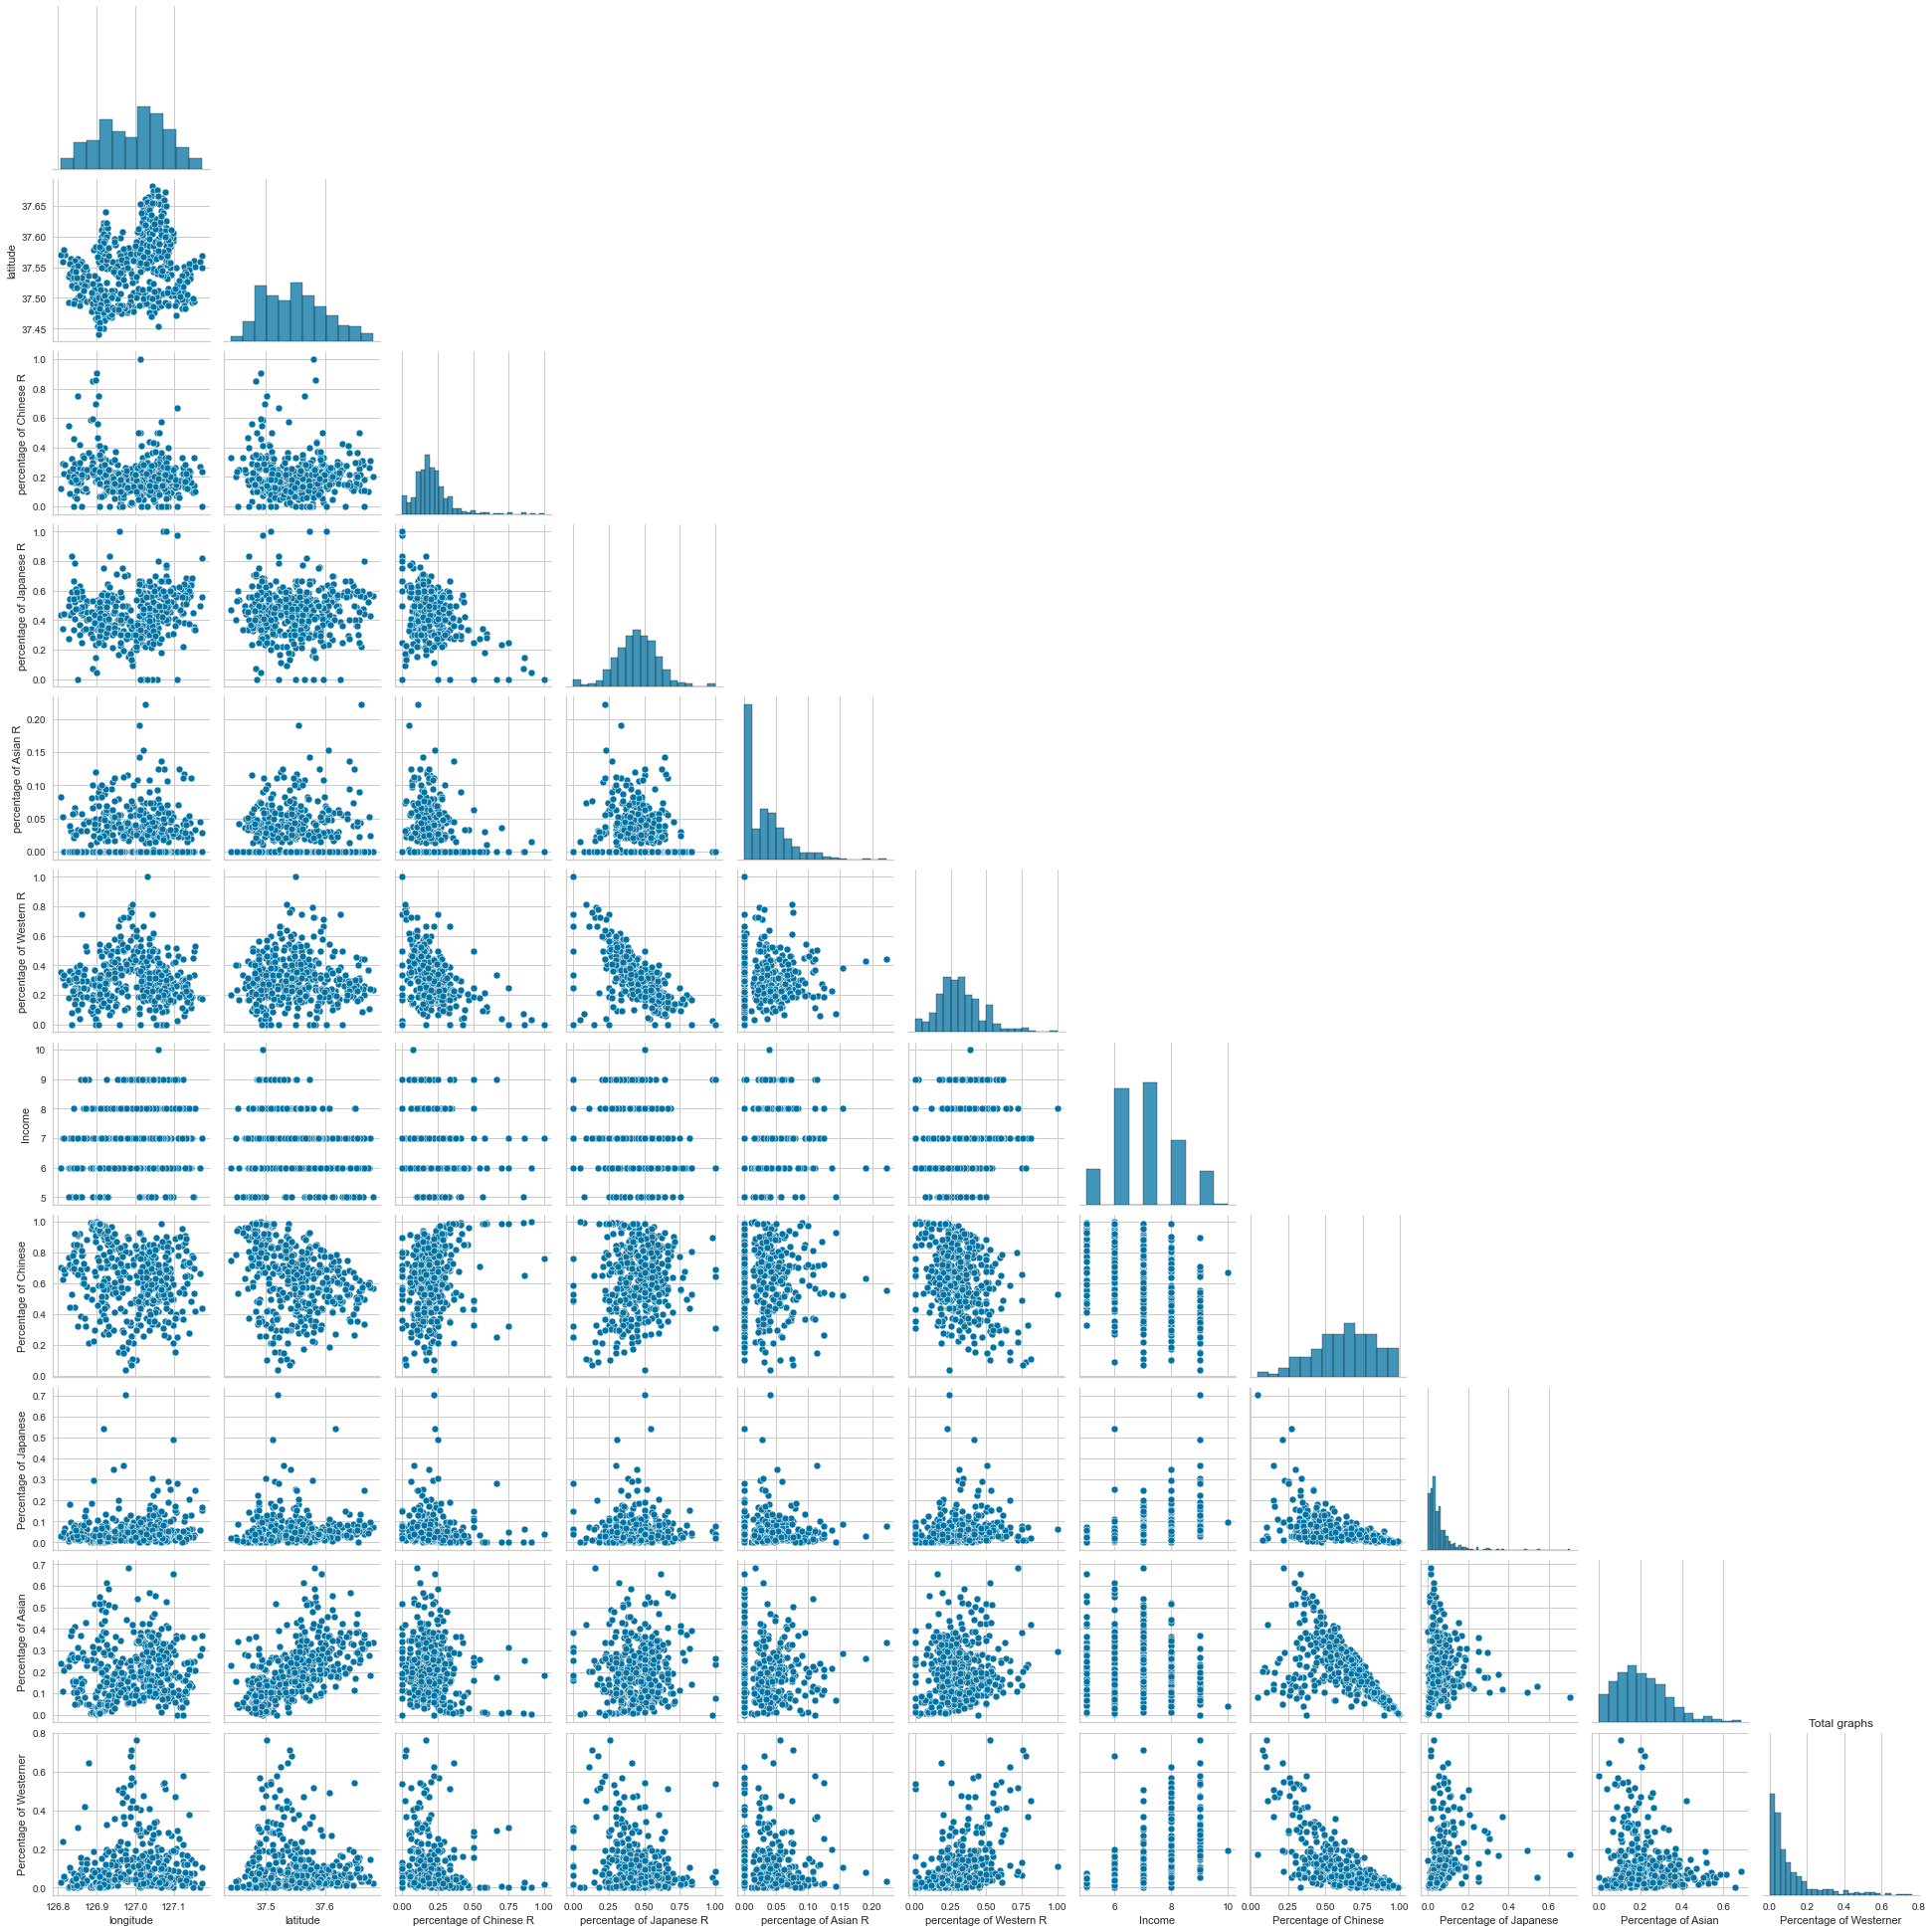

In [52]:
#It looks at the variance of the overall data
sns.pairplot(merge3,corner=True)
plt.title("Total graphs")
plt.show()

D:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warni

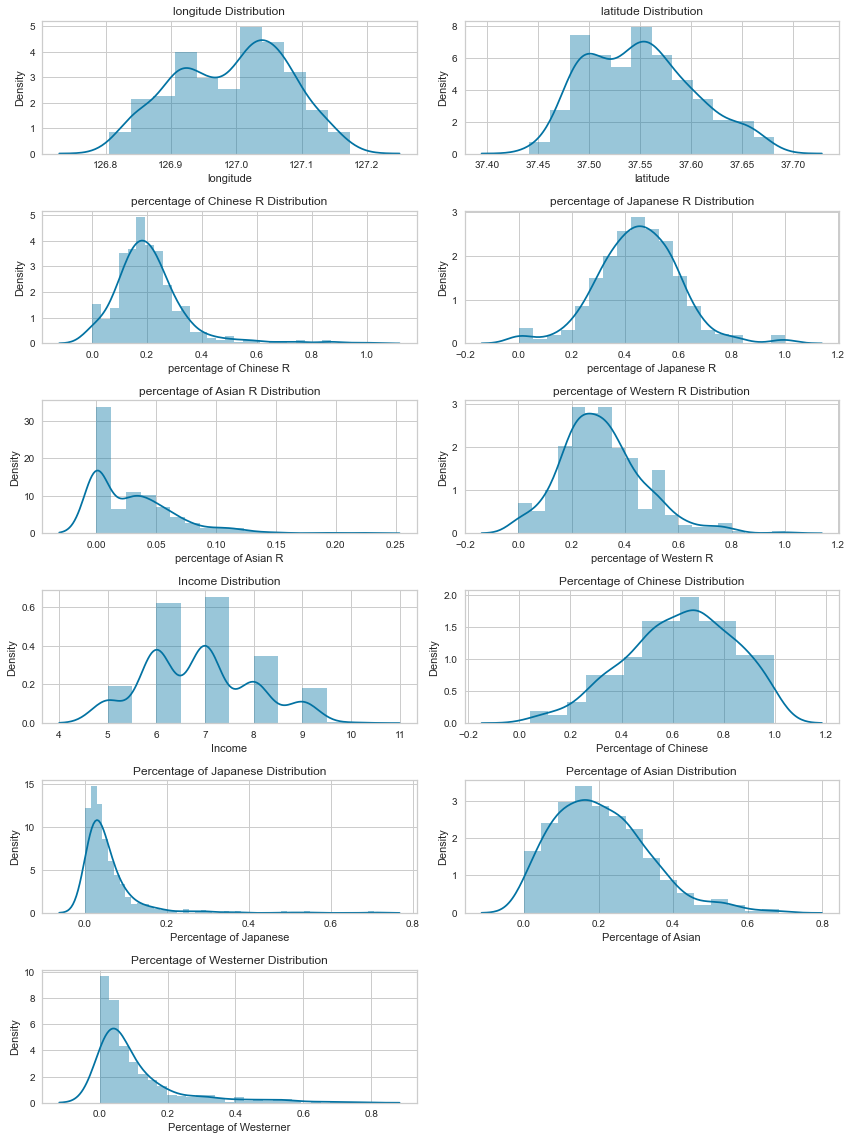

In [53]:
plt.figure(figsize=(12,16))
for i, j in enumerate(merge3.describe().columns):
    plt.subplot(6,2, i+1)
    sns.distplot(x=merge3[j])
    plt.xlabel(j)
    plt.title('{} Distribution'.format(j))
    # plt.subplots_adjust(wspace=.2, hspace=.5)
    plt.tight_layout()
plt.show()

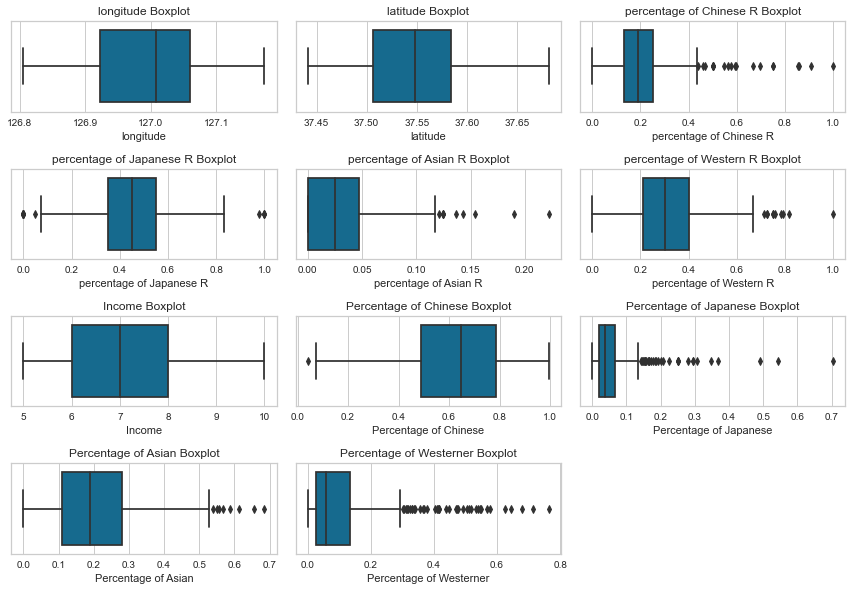

In [55]:
#Draw boxplot
plt.figure(figsize=(12,10))
for i, j in enumerate(merge3.describe().columns):
    plt.subplot(5,3, i+1)
    sns.boxplot(x=merge3[j])
    plt.title('{} Boxplot'.format(j))
    plt.tight_layout()
    
plt.show()

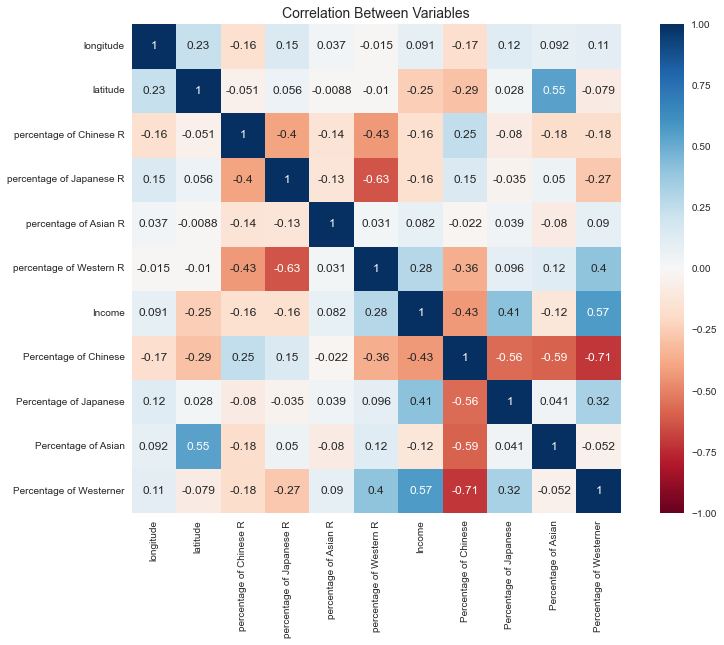

In [54]:
#Draw heatmap 
correlation_metrics=merge3.corr()
fig = plt.figure(figsize=(14,9))
sns.heatmap(correlation_metrics,square=True, annot=True, vmax=1, vmin=-1, cmap='RdBu')
plt.title('Correlation Between Variables', size=14)
plt.show()

## Cluster neighborhoods, use standardsdcaler to normalize our dataset 

In [56]:
#Clustering will be conducted 4 times by China, Japan, Western, and Asian
X_C = merge3[['percentage of Chinese R','Income','Percentage of Chinese']]   #Chinese
X_J = merge3[['percentage of Japanese R','Income','Percentage of Japanese']]   #Japanese
X_A = merge3[['percentage of Asian R','Income','Percentage of Asian']]   #Asian
X_W = merge3[['percentage of Western R','Income','Percentage of Westerner']]   #Western

X_C = np.nan_to_num(X_C)   #Chinese
X_J = np.nan_to_num(X_J)   #Japanese
X_A = np.nan_to_num(X_A)   #Asian
X_W = np.nan_to_num(X_W)   #Western

In [57]:
#Standard scaling
df_C_scaled = StandardScaler().fit_transform(X_C)
df_J_scaled = StandardScaler().fit_transform(X_J)
df_A_scaled = StandardScaler().fit_transform(X_A)
df_W_scaled = StandardScaler().fit_transform(X_W)
df_C_scaled

array([[-1.563858  ,  1.9317514 ,  1.27688807],
       [-0.58171409,  1.02912394,  0.88596533],
       [-0.37635673,  0.12649648,  1.03961726],
       ...,
       [-0.16430293,  0.12649648,  0.45194689],
       [-0.94183352,  0.12649648,  0.20236708],
       [-0.20671369,  1.02912394,  0.95973804]])

In [58]:
#Normalization
df_C_normalized = pd.DataFrame(df_C_scaled)
df_C_normalized.rename(columns={0:'% of Chinese Restaurants',1:'Household Income',2:'% of Chinese'}, inplace=True)
df_J_normalized = pd.DataFrame(df_J_scaled)
df_J_normalized.rename(columns={0:'% of Japanese Restaurants',1:'Household Income',2:'% of Japanese'}, inplace=True)
df_A_normalized = pd.DataFrame(df_A_scaled)
df_A_normalized.rename(columns={0:'% of Asian Restaurants',1:'Household Income',2:'% of Asian'}, inplace=True)
df_W_normalized = pd.DataFrame(df_W_scaled)
df_W_normalized.rename(columns={0:'% of Western Restaurants',1:'Household Income',2:'% of Westerner'}, inplace=True)

In [59]:
df_C_normalized

% of Chinese Restaurants  Household Income  % of Chinese
0                   -1.563858          1.931751      1.276888
1                   -0.581714          1.029124      0.885965
2                   -0.376357          0.126496      1.039617
3                    4.808100         -1.678758      1.743273
4                    0.940609         -0.776131      1.561622
..                        ...               ...           ...
416                 -0.817429          0.126496     -0.916405
417                 -0.590254          0.126496     -0.299022
418                 -0.164303          0.126496      0.451947
419                 -0.941834          0.126496      0.202367
420                 -0.206714          1.029124      0.959738

[421 rows x 3 columns]

# Clustering (Chinese) 

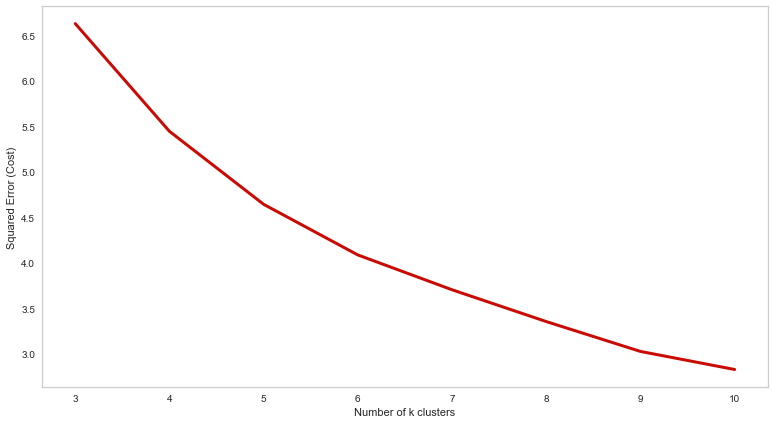

In [62]:
#Finding the optimal number of clusters, k (Chinese)

error_C=[]

for i in range(3, 11):
  KM = KMeans(n_clusters=i, max_iter=100)
  try:
    KM.fit(df_C_normalized)

  except ValueError:
    print('Error on line', i)

  # calculate squared error for the clustered points
  error_C.append(KM.inertia_ / 100)

# plot the K values against the squared error cost
plt.figure(figsize=(13,7))
plt.plot(range(3,11), error_C, color='r', linewidth=3)
plt.xlabel('Number of k clusters')
plt.ylabel('Squared Error (Cost)')
plt.grid(color='white', linestyle='-', linewidth=2)

plt.show()

KElbowVisualizer(ax=<AxesSubplot:>, estimator=KMeans(n_clusters=10), k=(3, 11))

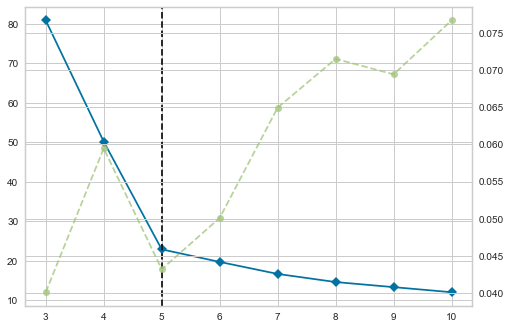

In [63]:
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(3,11))

visualizer.fit(X_C)
visualizer

In [64]:
#Clustering the Seoul dong Using K-Means with K = 4 (Chinese)
# 4 is the optimal number

# set number of clusters
kclusters = 4

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(df_C_normalized)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 0, 0, 2, 1, 3, 2, 0, 3, 1])

In [65]:
df_C_org = merge3[['dong','longitude','latitude','Income','Percentage of Chinese']]
df_C_org

dong   longitude   latitude  Income  Percentage of Chinese
0    가락1동  127.108313  37.494739     9.0               0.894737
1    가락2동  127.132111  37.495387     8.0               0.813084
2    가락본동  127.121324  37.497008     7.0               0.845178
3    가리봉동  126.888582  37.482108     5.0               0.992152
4     가산동  126.885555  37.477689     6.0               0.954210
..    ...         ...        ...     ...                    ...
416   효창동  126.961028  37.540797     7.0               0.436620
417   후암동  126.979295  37.548712     7.0               0.565574
418  휘경1동  127.059053  37.590364     7.0               0.722430
419  휘경2동  127.061439  37.588597     7.0               0.670300
420   흑석동  126.961385  37.507197     8.0               0.828493

[421 rows x 5 columns]

In [66]:
df_C_normalized.drop(['Household Income', '% of Chinese'], axis=1, inplace=True)
df_C_clustered = pd.merge(df_C_org, df_C_normalized, left_index=True, right_index=True)
df_C_clustered.insert(0, 'Cluster Label', kmeans.labels_)

In [68]:
#Draw folium map

latitude = df_C_org['latitude'].mean()
longitude=df_C_org['longitude'].mean()

# create map
map_clusters = folium.Map(location=[latitude,longitude], zoom_start=11)

# set color schemes for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(df_C_clustered['latitude'], df_C_clustered['longitude'], df_C_clustered['dong'], df_C_clustered['Cluster Label']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [69]:
df_C_clustered.loc[df_C_clustered['Cluster Label'] == 0]

Cluster Label  dong   longitude   latitude  Income  \
0                0  가락1동  127.108313  37.494739     9.0   
1                0  가락2동  127.132111  37.495387     8.0   
2                0  가락본동  127.121324  37.497008     7.0   
7                0  가양3동  126.860413  37.559271     7.0   
16               0  개포2동  127.067326  37.488202     9.0   
..             ...   ...         ...        ...     ...   
414              0   회기동  127.052385  37.592234     7.0   
417              0   후암동  126.979295  37.548712     7.0   
418              0  휘경1동  127.059053  37.590364     7.0   
419              0  휘경2동  127.061439  37.588597     7.0   
420              0   흑석동  126.961385  37.507197     8.0   

     Percentage of Chinese  % of Chinese Restaurants  
0                 0.894737                 -1.563858  
1                 0.813084                 -0.581714  
2                 0.845178                 -0.376357  
7                 0.658120                 -1.563858  
16                0.661538                 -0.319809  
..                     ...                       ...  
414               0.820302                  1.235252  
417               0.565574                 -0.590254  
418               0.722430                 -0.164303  
419               0.670300                 -0.941834  
420               0.828493                 -0.206714  

[138 rows x 7 columns]

In [70]:
df_C_clustered.loc[df_C_clustered['Cluster Label'] == 1]

Cluster Label  dong   longitude   latitude  Income  \
4                1   가산동  126.885555  37.477689     6.0   
9                1  갈현1동  126.918390  37.621549     6.0   
12               1  개봉1동  126.851388  37.500003     6.0   
13               1  개봉2동  126.856139  37.492215     6.0   
14               1  개봉3동  126.855406  37.487008     6.0   
..             ...   ...         ...        ...     ...   
406              1  화곡2동  126.856027  37.531037     5.0   
408              1  화곡4동  126.860898  37.533328     5.0   
410              1  화곡8동  126.847832  37.532337     6.0   
411              1  화곡본동  126.844643  37.543386     5.0   
412              1   화양동  127.070481  37.543970     6.0   

     Percentage of Chinese  % of Chinese Restaurants  
4                 0.954210                  0.940609  
9                 0.705128                 -0.093618  
12                0.906348                  0.426620  
13                0.838462                  0.400430  
14                0.830671                 -0.385285  
..                     ...                       ...  
406               0.846154                  0.675430  
408               0.810345                  0.074646  
410               0.848018                 -0.734492  
411               0.737662                 -0.188857  
412               0.869803                 -0.482822  

[152 rows x 7 columns]

In [71]:
df_C_clustered.loc[df_C_clustered['Cluster Label'] == 2]

Cluster Label   dong   longitude   latitude  Income  \
3                2   가리봉동  126.888582  37.482108     5.0   
6                2   가양2동  126.851604  37.564617     7.0   
23               2   고척2동  126.855172  37.504712     6.0   
32               2   구로2동  126.883236  37.494993     6.0   
34               2   구로4동  126.889254  37.491271     6.0   
48               2    난곡동  126.920402  37.471449     5.0   
66               2   대림1동  126.903418  37.494045     6.0   
67               2   대림2동  126.899487  37.490849     6.0   
68               2   대림3동  126.897410  37.497109     6.0   
84               2   독산3동  126.902504  37.475817     5.0   
85               2   독산4동  126.900784  37.468715     6.0   
169              2  상계10동  127.060684  37.657279     7.0   
214              2    수궁동  126.826421  37.492557     6.0   
215              2    수색동  126.896674  37.583413     7.0   
228              2   신길3동  126.907126  37.506975     7.0   
229              2   신길4동  126.911973  37.509124     6.0   
230              2   신길5동  126.905533  37.500479     6.0   
287              2   오류2동  126.840980  37.490652     6.0   
327              2   자양4동  127.066462  37.538402     7.0   
348              2    제기동  127.036782  37.584665     6.0   
374              2   창신3동  127.013515  37.580045     7.0   
381              2   청량리동  127.045891  37.584782     6.0   

     Percentage of Chinese  % of Chinese Restaurants  
3                 0.992152                  4.808100  
6                 0.323232                  4.034362  
23                0.922078                  1.546264  
32                0.989937                  2.846861  
34                0.985605                  2.888528  
48                0.881002                  1.421859  
66                0.991074                  1.489717  
67                0.995213                  5.211424  
68                0.983298                  3.634489  
84                0.985197                  2.634807  
85                0.959979                  1.919479  
169               0.491228                  2.168289  
214               0.706960                  2.507575  
215               0.652482                  4.834108  
228               0.978822                  1.509675  
229               0.985704                  1.235252  
230               0.983437                  4.034362  
287               0.852459                  1.857277  
327               0.982229                  2.733766  
348               0.850223                  1.725492  
374               0.761905                  5.900436  
381               0.852375                  1.681487

In [72]:
df_C_clustered.loc[df_C_clustered['Cluster Label'] == 3]

Cluster Label  dong   longitude   latitude  Income  \
5                3  가양1동  126.832780  37.563368     7.0   
8                3   가회동  126.986344  37.578799     7.0   
10               3  갈현2동  126.916436  37.616705     6.0   
11               3   강일동  127.173502  37.568244     7.0   
15               3  개포1동  127.055226  37.483946     9.0   
..             ...   ...         ...        ...     ...   
393              3  한강로동  126.968403  37.530248     9.0   
394              3   한남동  127.003430  37.535362     8.0   
402              3  홍제1동  126.944790  37.586931     7.0   
415              3   회현동  126.976998  37.557991     8.0   
416              3   효창동  126.961028  37.540797     7.0   

     Percentage of Chinese  % of Chinese Restaurants  
5                 0.441624                 -0.280523  
8                 0.326531                 -1.390270  
10                0.271137                  0.132572  
11                0.435897                 -1.563858  
15                0.485294                  2.168289  
..                     ...                       ...  
393               0.147338                 -0.931291  
394               0.295198                 -0.784619  
402               0.415473                 -0.415505  
415               0.356643                  0.276653  
416               0.436620                 -0.817429  

[109 rows x 7 columns]

# Clustering (Chinese) 

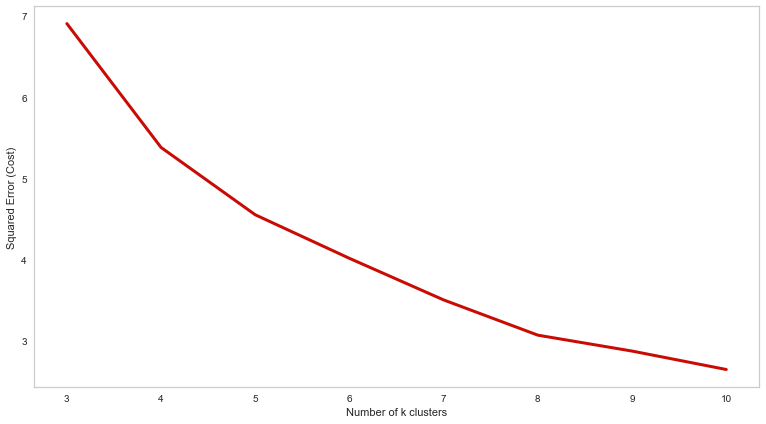

In [74]:
#Finding the optimal number of clusters, k (Japanese)

error_J=[]

for i in range(3, 11):
  KM = KMeans(n_clusters=i, max_iter=100)
  try:
    KM.fit(df_J_normalized)

  except ValueError:
    print('Error on line', i)

  # calculate squared error for the clustered points
  error_J.append(KM.inertia_ / 100)

# plot the K values against the squared error cost
plt.figure(figsize=(13,7))
plt.plot(range(3,11), error_J, color='r', linewidth=3)
plt.xlabel('Number of k clusters')
plt.ylabel('Squared Error (Cost)')
plt.grid(color='white', linestyle='-', linewidth=2)

plt.show()

KElbowVisualizer(ax=<AxesSubplot:>, estimator=KMeans(n_clusters=10), k=(3, 11))

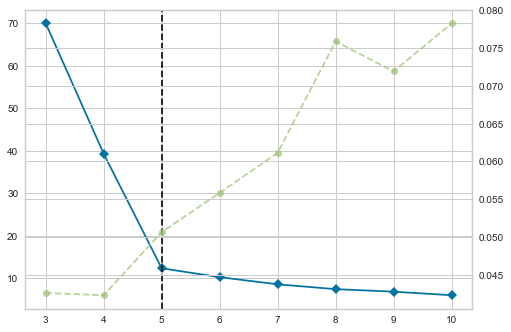

In [75]:
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(3,11))

visualizer.fit(X_J)
visualizer

In [76]:
#Clustering the Seoul dong Using K-Means with K = 5 (Japanese)

# set number of clusters
kclusters = 5

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(df_J_normalized)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([4, 4, 4, 0, 0, 4, 0, 0, 0, 1])

In [77]:
df_J_org = merge3[['dong','longitude','latitude','Income','Percentage of Japanese']]
df_J_org

dong   longitude   latitude  Income  Percentage of Japanese
0    가락1동  127.108313  37.494739     9.0                0.052632
1    가락2동  127.132111  37.495387     8.0                0.032710
2    가락본동  127.121324  37.497008     7.0                0.027919
3    가리봉동  126.888582  37.482108     5.0                0.000406
4     가산동  126.885555  37.477689     6.0                0.002708
..    ...         ...        ...     ...                     ...
416   효창동  126.961028  37.540797     7.0                0.077465
417   후암동  126.979295  37.548712     7.0                0.049180
418  휘경1동  127.059053  37.590364     7.0                0.041121
419  휘경2동  127.061439  37.588597     7.0                0.040872
420   흑석동  126.961385  37.507197     8.0                0.012603

[421 rows x 5 columns]

In [78]:
df_J_normalized.drop(['Household Income', '% of Japanese'], axis=1, inplace=True)
df_J_clustered = pd.merge(df_J_org, df_J_normalized, left_index=True, right_index=True)
df_J_clustered.insert(0, 'Cluster Label', kmeans.labels_)

In [79]:
#draw japanese folium map 

latitude = df_J_org['latitude'].mean()
longitude=df_J_org['longitude'].mean()

# create map
map_clusters = folium.Map(location=[latitude,longitude], zoom_start=11)

# set color schemes for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(df_J_clustered['latitude'], df_J_clustered['longitude'], df_J_clustered['dong'], df_J_clustered['Cluster Label']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [80]:
df_J_clustered.loc[df_J_clustered['Cluster Label'] == 0]

Cluster Label  dong   longitude   latitude  Income  \
3                0  가리봉동  126.888582  37.482108     5.0   
4                0   가산동  126.885555  37.477689     6.0   
6                0  가양2동  126.851604  37.564617     7.0   
7                0  가양3동  126.860413  37.559271     7.0   
8                0   가회동  126.986344  37.578799     7.0   
..             ...   ...         ...        ...     ...   
406              0  화곡2동  126.856027  37.531037     5.0   
412              0   화양동  127.070481  37.543970     6.0   
414              0   회기동  127.052385  37.592234     7.0   
416              0   효창동  126.961028  37.540797     7.0   
417              0   후암동  126.979295  37.548712     7.0   

     Percentage of Japanese  % of Japanese Restaurants  
3                  0.000406                  -2.418417  
4                  0.002708                  -0.684137  
6                  0.050505                  -2.890274  
7                  0.076923                  -1.278097  
8                  0.071429                  -1.840484  
..                      ...                        ...  
406                0.025641                  -0.955661  
412                0.020058                  -0.177369  
414                0.036351                  -0.975814  
416                0.077465                  -0.955661  
417                0.049180                  -0.927623  

[113 rows x 7 columns]

In [81]:
df_J_clustered.loc[df_J_clustered['Cluster Label'] == 1]

Cluster Label  dong   longitude   latitude  Income  \
9                1  갈현1동  126.918390  37.621549     6.0   
12               1  개봉1동  126.851388  37.500003     6.0   
14               1  개봉3동  126.855406  37.487008     6.0   
18               1  거여1동  127.144347  37.495693     6.0   
21               1  고덕2동  127.167345  37.558879     6.0   
..             ...   ...         ...        ...     ...   
382              1   청룡동  126.945068  37.480912     6.0   
405              1  화곡1동  126.840765  37.533432     6.0   
408              1  화곡4동  126.860898  37.533328     5.0   
410              1  화곡8동  126.847832  37.532337     6.0   
411              1  화곡본동  126.844643  37.543386     5.0   

     Percentage of Japanese  % of Japanese Restaurants  
9                  0.076923                   0.334080  
12                 0.010406                   0.978951  
14                 0.035144                   1.182595  
18                 0.058394                   1.408865  
21                 0.057971                   0.334080  
..                      ...                        ...  
382                0.010676                   0.086053  
405                0.023466                   0.608493  
408                0.022989                   0.255438  
410                0.035242                   0.931183  
411                0.057143                   0.164378  

[111 rows x 7 columns]

In [82]:
df_J_clustered.loc[df_J_clustered['Cluster Label'] == 2]

Cluster Label  dong   longitude   latitude  Income  \
15               2  개포1동  127.055226  37.483946     9.0   
16               2  개포2동  127.067326  37.488202     9.0   
20               2  고덕1동  127.152491  37.560744     8.0   
24               2   공덕동  126.955200  37.546817     8.0   
28               2   광장동  127.105368  37.549652     9.0   
..             ...   ...         ...        ...     ...   
387              2   평창동  126.967468  37.607625     8.0   
394              2   한남동  127.003430  37.535362     8.0   
396              2  행당1동  127.035743  37.560341     8.0   
415              2   회현동  126.976998  37.557991     8.0   
420              2   흑석동  126.961385  37.507197     8.0   

     Percentage of Japanese  % of Japanese Restaurants  
15                 0.147059                  -2.890274  
16                 0.092308                   0.871473  
20                 0.032609                  -0.587164  
24                 0.163462                  -0.181816  
28                 0.030120                  -0.501863  
..                      ...                        ...  
387                0.059172                  -0.936120  
394                0.028955                  -1.472975  
396                0.025773                  -0.344731  
415                0.055944                  -1.123504  
420                0.012603                  -0.310790  

[85 rows x 7 columns]

In [83]:
df_J_clustered.loc[df_J_clustered['Cluster Label'] == 3]

Cluster Label  dong   longitude   latitude  Income  \
10               3  갈현2동  126.916436  37.616705     6.0   
38               3  구의2동  127.090316  37.549927     6.0   
77               3  도곡2동  127.047277  37.485409     9.0   
109              3  명일2동  127.154730  37.551509     8.0   
175              3  상계8동  127.056642  37.666081     7.0   
183              3   상암동  126.892084  37.578924     8.0   
277              3  역삼2동  127.043763  37.499108     9.0   
292              3   용강동  126.944010  37.542010     8.0   
314              3  이촌1동  126.975138  37.519742     9.0   
328              3  잠실2동  127.083689  37.514610     9.0   
329              3  잠실3동  127.097045  37.511159     9.0   
330              3  잠실4동  127.107714  37.521001     9.0   
393              3  한강로동  126.968403  37.530248     9.0   

     Percentage of Japanese  % of Japanese Restaurants  
10                 0.542274                   0.627203  
38                 0.251572                   0.426205  
77                 0.225000                  -0.391399  
109                0.250000                  -0.740704  
175                0.250000                  -0.024181  
183                0.295872                   0.040957  
277                0.306569                  -0.410001  
292                0.346154                   0.000526  
314                0.704715                   0.334080  
328                0.293478                  -0.234923  
329                0.489362                  -0.919835  
330                0.280000                  -2.890274  
393                0.368344                  -0.959305

In [84]:
df_J_clustered.loc[df_J_clustered['Cluster Label'] == 4]

Cluster Label  dong   longitude   latitude  Income  \
0                4  가락1동  127.108313  37.494739     9.0   
1                4  가락2동  127.132111  37.495387     8.0   
2                4  가락본동  127.121324  37.497008     7.0   
5                4  가양1동  126.832780  37.563368     7.0   
11               4   강일동  127.173502  37.568244     7.0   
..             ...   ...         ...        ...     ...   
407              4  화곡3동  126.836457  37.543641     7.0   
409              4  화곡6동  126.850509  37.552061     7.0   
413              4   황학동  127.021054  37.566975     7.0   
418              4  휘경1동  127.059053  37.590364     7.0   
419              4  휘경2동  127.061439  37.588597     7.0   

     Percentage of Japanese  % of Japanese Restaurants  
0                  0.052632                   3.411873  
1                  0.032710                   1.522000  
2                  0.027919                   1.066888  
5                  0.096447                  -0.084520  
11                 0.153846                   2.385942  
..                      ...                        ...  
407                0.025974                   0.057707  
409                0.015464                   0.189706  
413                0.009636                   0.180540  
418                0.041121                   0.334080  
419                0.040872                   0.334080  

[99 rows x 7 columns]

# Clustering (Asian)

C:\Users\namyeong\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\namyeong\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\namyeong\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\namyeong\AppData\Roaming\Python\Python39\site-packages\sklearn\c

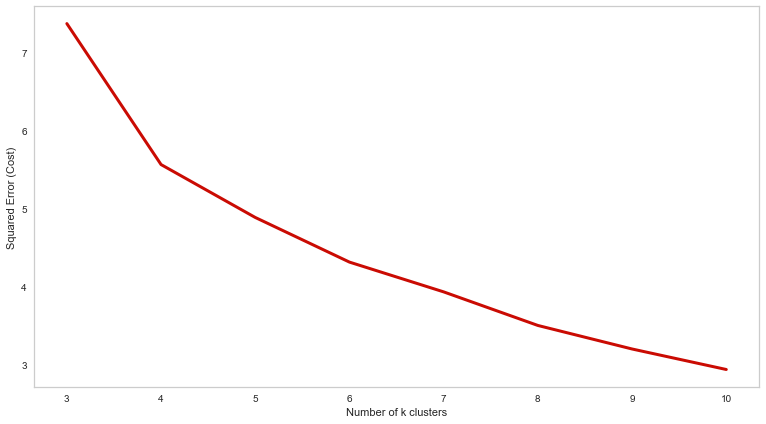

In [99]:
#Finding the optimal number of clusters, k (Asian)

error_A=[]

for i in range(3, 11):
  KM = KMeans(n_clusters=i, max_iter=100)
  try:
    KM.fit(df_A_normalized)

  except ValueError:
    print('Error on line', i)

  # calculate squared error for the clustered points
  error_A.append(KM.inertia_ / 100)

# plot the K values against the squared error cost
plt.figure(figsize=(13,7))
plt.plot(range(3,11), error_A, color='r', linewidth=3)
plt.xlabel('Number of k clusters')
plt.ylabel('Squared Error (Cost)')
plt.grid(color='white', linestyle='-', linewidth=2)

plt.show()

KElbowVisualizer(ax=<AxesSubplot:>, estimator=KMeans(n_clusters=10), k=(3, 11))

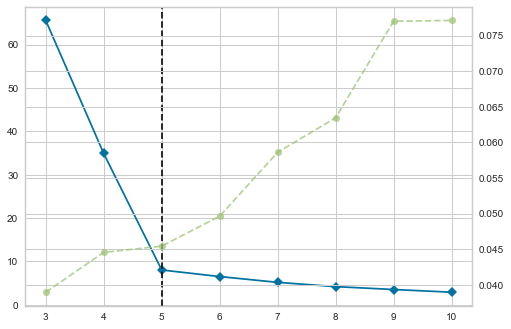

In [85]:
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(3,11))

visualizer.fit(X_A)
visualizer

In [86]:
#Clustering the Seoul dong Using K-Means with K = 5 (Asian)

# set number of clusters
kclusters = 5

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(df_A_normalized)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([1, 1, 2, 2, 2, 3, 3, 2, 0, 2])

In [87]:
df_A_org = merge3[['dong','longitude','latitude','Income','Percentage of Asian']]
df_A_org

dong   longitude   latitude  Income  Percentage of Asian
0    가락1동  127.108313  37.494739     9.0             0.000000
1    가락2동  127.132111  37.495387     8.0             0.102804
2    가락본동  127.121324  37.497008     7.0             0.071066
3    가리봉동  126.888582  37.482108     5.0             0.006631
4     가산동  126.885555  37.477689     6.0             0.041605
..    ...         ...        ...     ...                  ...
416   효창동  126.961028  37.540797     7.0             0.246479
417   후암동  126.979295  37.548712     7.0             0.157787
418  휘경1동  127.059053  37.590364     7.0             0.214019
419  휘경2동  127.061439  37.588597     7.0             0.258856
420   흑석동  126.961385  37.507197     8.0             0.106849

[421 rows x 5 columns]

In [88]:
df_A_normalized.drop(['Household Income', '% of Asian'], axis=1, inplace=True)
df_A_clustered = pd.merge(df_A_org, df_A_normalized, left_index=True, right_index=True)
df_A_clustered.insert(0, 'Cluster Label', kmeans.labels_)

In [89]:
#Draw asian folium map

latitude = df_A_org['latitude'].mean()
longitude=df_A_org['longitude'].mean()

# create map
map_clusters = folium.Map(location=[latitude,longitude], zoom_start=11)

# set color schemes for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(df_A_clustered['latitude'], df_A_clustered['longitude'], df_A_clustered['dong'], df_A_clustered['Cluster Label']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [90]:
df_A_clustered.loc[df_A_clustered['Cluster Label'] == 0]

Cluster Label  dong   longitude   latitude  Income  Percentage of Asian  \
8                0   가회동  126.986344  37.578799     7.0             0.234694   
21               0  고덕2동  127.167345  37.558879     6.0             0.275362   
25               0  공릉1동  127.074981  37.622640     6.0             0.210526   
29               0   광희동  127.004398  37.565793     7.0             0.539073   
40               0   군자동  127.073804  37.553220     6.0             0.256000   
..             ...   ...         ...        ...     ...                  ...   
402              0  홍제1동  126.944790  37.586931     7.0             0.504298   
404              0  홍제3동  126.945628  37.591970     6.0             0.192982   
407              0  화곡3동  126.836457  37.543641     7.0             0.155844   
415              0   회현동  126.976998  37.557991     8.0             0.442308   
417              0   후암동  126.979295  37.548712     7.0             0.157787   

     % of Asian Restaurants  
8                 -0.198981  
21                 0.443269  
25                 0.965128  
29                 2.255952  
40                 0.855459  
..                      ...  
402                1.353711  
404                0.650914  
407                0.781433  
415                1.109818  
417                0.386092  

[69 rows x 7 columns]

In [91]:
df_A_clustered.loc[df_A_clustered['Cluster Label'] == 1]

Cluster Label  dong   longitude   latitude  Income  Percentage of Asian  \
0                1  가락1동  127.108313  37.494739     9.0             0.000000   
1                1  가락2동  127.132111  37.495387     8.0             0.102804   
15               1  개포1동  127.055226  37.483946     9.0             0.161765   
16               1  개포2동  127.067326  37.488202     9.0             0.138462   
28               1   광장동  127.105368  37.549652     9.0             0.367470   
..             ...   ...         ...        ...     ...                  ...   
387              1   평창동  126.967468  37.607625     8.0             0.260355   
394              1   한남동  127.003430  37.535362     8.0             0.260593   
396              1  행당1동  127.035743  37.560341     8.0             0.108247   
397              1  행당2동  127.028380  37.556400     8.0             0.294118   
420              1   흑석동  126.961385  37.507197     8.0             0.106849   

     % of Asian Restaurants  
0                 -0.871814  
1                 -0.871814  
15                -0.871814  
16                -0.871814  
28                 0.199735  
..                      ...  
387               -0.871814  
394                0.240949  
396                0.650914  
397               -0.871814  
420                0.180252  

[89 rows x 7 columns]

In [92]:
df_A_clustered.loc[df_A_clustered['Cluster Label'] == 2]

Cluster Label  dong   longitude   latitude  Income  Percentage of Asian  \
2                2  가락본동  127.121324  37.497008     7.0             0.071066   
3                2  가리봉동  126.888582  37.482108     5.0             0.006631   
4                2   가산동  126.885555  37.477689     6.0             0.041605   
7                2  가양3동  126.860413  37.559271     7.0             0.136752   
9                2  갈현1동  126.918390  37.621549     6.0             0.188034   
..             ...   ...         ...        ...     ...                  ...   
410              2  화곡8동  126.847832  37.532337     6.0             0.105727   
411              2  화곡본동  126.844643  37.543386     5.0             0.155844   
412              2   화양동  127.070481  37.543970     6.0             0.072939   
413              2   황학동  127.021054  37.566975     7.0             0.082441   
414              2   회기동  127.052385  37.592234     7.0             0.100823   

     % of Asian Restaurants  
2                 -0.214273  
3                 -0.871814  
4                  0.460573  
7                 -0.871814  
9                  0.004908  
..                      ...  
410               -0.871814  
411               -0.110450  
412                0.125835  
413                0.505892  
414               -0.419754  

[136 rows x 7 columns]

In [93]:
df_A_clustered.loc[df_A_clustered['Cluster Label'] == 3]

Cluster Label  dong   longitude   latitude  Income  Percentage of Asian  \
5                3  가양1동  126.832780  37.563368     7.0             0.370558   
6                3  가양2동  126.851604  37.564617     7.0             0.313131   
11               3   강일동  127.173502  37.568244     7.0             0.307692   
20               3  고덕1동  127.152491  37.560744     8.0             0.358696   
26               3  공릉2동  127.079959  37.625910     7.0             0.328228   
..             ...   ...         ...        ...     ...                  ...   
401              3  홍은2동  126.929727  37.582491     6.0             0.586139   
403              3  홍제2동  126.947634  37.586252     7.0             0.363636   
409              3  화곡6동  126.850509  37.552061     7.0             0.268041   
416              3   효창동  126.961028  37.540797     7.0             0.246479   
419              3  휘경2동  127.061439  37.588597     7.0             0.258856   

     % of Asian Restaurants  
5                  0.041823  
6                 -0.871814  
11                -0.871814  
20                -0.871814  
26                -0.871814  
..                      ...  
401               -0.871814  
403               -0.871814  
409               -0.871814  
416               -0.871814  
419               -0.871814  

[91 rows x 7 columns]

In [109]:
df_A_clustered.loc[df_A_clustered['Cluster Label'] == 4]

Cluster Label    dong   longitude   latitude  Income  \
18               4    거여1동  127.144347  37.495693     6.0   
24               4     공덕동  126.955200  37.546817     8.0   
33               4    구로3동  126.896740  37.484425     6.0   
35               4    구로5동  126.888906  37.502268     7.0   
43               4   금호4가동  127.020711  37.547612     8.0   
45               4    길음1동  127.021146  37.606203     8.0   
53               4     남현동  126.979207  37.475671     7.0   
60               4      능동  127.081922  37.554831     6.0   
61               4     다산동  127.009883  37.555699     6.0   
64               4    당산1동  126.896418  37.524005     7.0   
65               4    당산2동  126.901654  37.531819     8.0   
66               4    대림1동  126.903418  37.494045     6.0   
75               4     대흥동  126.940462  37.550703     7.0   
99               4    망원1동  126.905905  37.555471     6.0   
138              4    방학3동  127.026078  37.661553     6.0   
180              4    상도4동  126.938300  37.499951     6.0   
190              4    서초1동  127.017521  37.490048     8.0   
203              4  성수1가2동  127.045642  37.547348     7.0   
204              4  성수2가1동  127.056002  37.539566     6.0   
212              4    송파1동  127.109357  37.508642     7.0   
227              4    신길1동  126.919399  37.511571     6.0   
238              4   신대방2동  126.924123  37.494251     7.0   
267              4    암사2동  127.126942  37.550886     7.0   
281              4     염리동  126.946382  37.546565     8.0   
288              4     오륜동  127.123884  37.517855     9.0   
333              4    잠실본동  127.083047  37.508821     7.0   
352              4     종암동  127.035440  37.596423     7.0   
353              4    중계1동  127.074814  37.649606     8.0   
354              4  중계2.3동  127.065783  37.641387     6.0   
372              4    창신1동  127.013190  37.572333     5.0   
373              4    창신2동  127.010793  37.573146     5.0   
389              4    풍납2동  127.114390  37.528286     8.0   
390              4      필동  126.994512  37.561291     7.0   
393              4    한강로동  126.968403  37.530248     9.0   
395              4     합정동  126.912484  37.549026     7.0   
418              4    휘경1동  127.059053  37.590364     7.0   

     Percentage of Asian  % of Asian Restaurants  
18              0.211679                2.342834  
24              0.185440                1.442733  
33              0.037175                1.146686  
35              0.012984                2.021369  
43              0.154286                1.271285  
45              0.286408                3.579237  
53              0.123348                2.466474  
60              0.224719                2.228025  
61              0.262295                4.639011  
64              0.096026                2.619959  
65              0.113208                1.539172  
66              0.008368                1.758353  
75              0.109499                2.173642  
99              0.216471                1.941003  
138             0.338462                5.557482  
180             0.092269                1.883599  
190             0.173913                1.319991  
203             0.165394                1.271285  
204             0.150127                1.840545  
212             0.093596                1.194745  
227             0.020392                1.643997  
238             0.050532                0.974899  
267             0.241379                2.531931  
281             0.066376                2.342834  
288             0.000000                2.342834  
333             0.079277                1.194745  
352             0.131335                2.255952  
353             0.113924                2.744665  
354             0.215909                3.073436  
372             0.070345                1.442733  
373             0.066183                3.261305  
389             0.180233                2.744665  
390             0.180743                2.021369  
393          

# Clustering (Western)

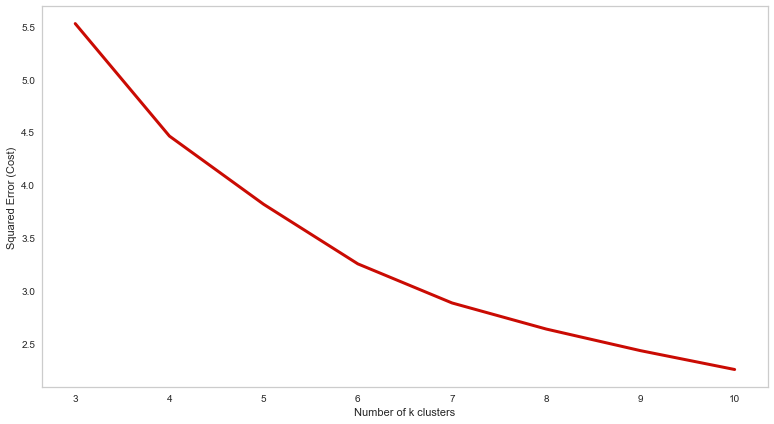

In [94]:
#Finding the optimal number of clusters, k (Western)

error_W=[]

for i in range(3, 11):
  KM = KMeans(n_clusters=i, max_iter=100)
  try:
    KM.fit(df_W_normalized)

  except ValueError:
    print('Error on line', i)

  # calculate squared error for the clustered points
  error_W.append(KM.inertia_ / 100)

# plot the K values against the squared error cost
plt.figure(figsize=(13,7))
plt.plot(range(3,11), error_W, color='r', linewidth=3)
plt.xlabel('Number of k clusters')
plt.ylabel('Squared Error (Cost)')
plt.grid(color='white', linestyle='-', linewidth=2)

plt.show()

KElbowVisualizer(ax=<AxesSubplot:>, estimator=KMeans(n_clusters=10), k=(3, 11))

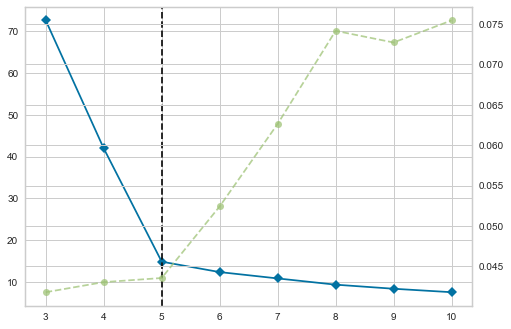

In [95]:
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(3,11))

visualizer.fit(X_W)
visualizer

In [96]:
#Clustering the Seoul dong Using K-Means with K = 5 (Western)

# set number of clusters
kclusters = 5

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(df_W_normalized)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([2, 2, 2, 3, 3, 2, 4, 0, 1, 3])

In [97]:
df_W_org = merge3[['dong','longitude','latitude','Income','Percentage of Westerner']]
df_W_org

dong   longitude   latitude  Income  Percentage of Westerner
0    가락1동  127.108313  37.494739     9.0                 0.052632
1    가락2동  127.132111  37.495387     8.0                 0.051402
2    가락본동  127.121324  37.497008     7.0                 0.055838
3    가리봉동  126.888582  37.482108     5.0                 0.000812
4     가산동  126.885555  37.477689     6.0                 0.001477
..    ...         ...        ...     ...                      ...
416   효창동  126.961028  37.540797     7.0                 0.239437
417   후암동  126.979295  37.548712     7.0                 0.227459
418  휘경1동  127.059053  37.590364     7.0                 0.022430
419  휘경2동  127.061439  37.588597     7.0                 0.029973
420   흑석동  126.961385  37.507197     8.0                 0.052055

[421 rows x 5 columns]

In [98]:
df_W_normalized.drop(['Household Income', '% of Westerner'], axis=1, inplace=True)
df_W_clustered = pd.merge(df_W_org, df_W_normalized, left_index=True, right_index=True)
df_W_clustered.insert(0, 'Cluster Label', kmeans.labels_)

In [99]:
#Draw folium map 

latitude = df_W_org['latitude'].mean()
longitude=df_W_org['longitude'].mean()

# create map
map_clusters = folium.Map(location=[latitude,longitude], zoom_start=11)

# set color schemes for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(df_W_clustered['latitude'], df_W_clustered['longitude'], df_W_clustered['dong'], df_W_clustered['Cluster Label']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [100]:
df_W_clustered.loc[df_W_clustered['Cluster Label'] == 0]

Cluster Label  dong   longitude   latitude  Income  \
7                0  가양3동  126.860413  37.559271     7.0   
20               0  고덕1동  127.152491  37.560744     8.0   
26               0  공릉2동  127.079959  37.625910     7.0   
29               0   광희동  127.004398  37.565793     7.0   
31               0  구로1동  126.874672  37.494517     7.0   
..             ...   ...         ...        ...     ...   
402              0  홍제1동  126.944790  37.586931     7.0   
412              0   화양동  127.070481  37.543970     6.0   
416              0   효창동  126.961028  37.540797     7.0   
417              0   후암동  126.979295  37.548712     7.0   
419              0  휘경2동  127.061439  37.588597     7.0   

     Percentage of Westerner  % of Western Restaurants  
7                   0.128205                  2.837419  
20                  0.076087                  1.217294  
26                  0.166302                  0.497238  
29                  0.078146                  0.779422  
31                  0.028078                  1.217294  
..                       ...                       ...  
402                 0.054441                  0.718794  
412                 0.037199                  0.569244  
416                 0.239437                  1.865344  
417                 0.227459                  1.358174  
419                 0.029973                  0.677252  

[70 rows x 7 columns]

In [101]:
df_W_clustered.loc[df_W_clustered['Cluster Label'] == 1]

Cluster Label   dong   longitude   latitude  Income  \
8                1    가회동  126.986344  37.578799     7.0   
114              1    목5동  126.879887  37.536390     9.0   
124              1   반포2동  126.995870  37.508691     9.0   
126              1   반포4동  127.003397  37.501430     9.0   
127              1   반포본동  126.987701  37.501879     9.0   
132              1   방배4동  126.988891  37.488660     8.0   
133              1   방배본동  126.986790  37.494654     8.0   
160              1    사직동  126.972734  37.573941     9.0   
164              1   삼성2동  127.049360  37.510955     9.0   
188              1   서빙고동  126.991531  37.525020     8.0   
193              1   서초4동  127.020936  37.499460     9.0   
199              1    성북동  127.002795  37.592007     7.0   
208              1    소공동  126.976413  37.563361     8.0   
243              1    신사동  127.008052  37.515961     9.0   
257              1   신정6동  126.868923  37.520205     9.0   
269              1   압구정동  127.035263  37.525837     9.0   
288              1    오륜동  127.123884  37.517855     9.0   
289              1    옥수동  127.013570  37.542892     8.0   
295              1  용산2가동  126.985761  37.543843     6.0   
299              1  원효로1동  126.966136  37.537877     8.0   
315              1   이촌2동  126.956554  37.522798     7.0   
316              1  이태원1동  126.992547  37.534143     7.0   
317              1  이태원2동  126.990455  37.539493     7.0   
331              1   잠실6동  127.102992  37.515327     9.0   
353              1   중계1동  127.074814  37.649606     8.0   
380              1    청담동  127.045987  37.523732     9.0   
384              1  청운효자동  126.969611  37.580432     8.0   
387              1    평창동  126.967468  37.607625     8.0   
393              1   한강로동  126.968403  37.530248     9.0   
394              1    한남동  127.003430  37.535362     8.0   

     Percentage of Westerner  % of Western Restaurants  
8                   0.367347                  3.101160  
114                 0.645161                 -0.844684  
124                 0.548387                  1.865344  
126                 0.764069                  1.378157  
127                 0.534483                  1.680187  
132                 0.569395                  0.596820  
133                 0.412698                  0.422515  
160                 0.329502                  1.217294  
164                 0.336493                  1.252135  
188                 0.623563                  2.297377  
193                 0.476636                  0.053320  
199                 0.301887                  2.069991  
208                 0.470443                  0.377229  
243                 0.330612                  1.337303  
257                 0.416667                  0.407231  
269                 0.408537                  1.779187  
288                 0.578947                  0.857266  
289                 0.404494                  1.703331  
295                 0.680380                  3.039935  
299                 0.438559                  1.511862  
315                 0.505882                  2.297377  
316                 0.448953                  3.257452  
317                 0.713033                  2.899732  
331                 0.471429                  0.724212  
353                 0.544304                 -0.402831  
380                 0.276265                  1.996309  
384                 0.518519                  2.665065  
387                 0.491124                  1.511862  
393                 0.366156                  1.235600  
394                 0.415254                  2.107473

In [102]:
df_W_clustered.loc[df_W_clustered['Cluster Label'] == 2]

Cluster Label  dong   longitude   latitude  Income  \
0                2  가락1동  127.108313  37.494739     9.0   
1                2  가락2동  127.132111  37.495387     8.0   
2                2  가락본동  127.121324  37.497008     7.0   
5                2  가양1동  126.832780  37.563368     7.0   
11               2   강일동  127.173502  37.568244     7.0   
..             ...   ...         ...        ...     ...   
409              2  화곡6동  126.850509  37.552061     7.0   
413              2   황학동  127.021054  37.566975     7.0   
414              2   회기동  127.052385  37.592234     7.0   
418              2  휘경1동  127.059053  37.590364     7.0   
420              2   흑석동  126.961385  37.507197     8.0   

     Percentage of Westerner  % of Western Restaurants  
0                   0.052632                 -1.875673  
1                   0.051402                 -0.829180  
2                   0.055838                 -0.697400  
5                   0.091371                  0.319119  
11                  0.102564                 -0.844684  
..                       ...                       ...  
409                 0.061856                  0.298417  
413                 0.023555                 -0.788576  
414                 0.042524                  0.002200  
418                 0.022430                 -0.807863  
420                 0.052055                  0.451416  

[126 rows x 7 columns]

In [103]:
df_W_clustered.loc[df_W_clustered['Cluster Label'] == 3]

Cluster Label  dong   longitude   latitude  Income  \
3                3  가리봉동  126.888582  37.482108     5.0   
4                3   가산동  126.885555  37.477689     6.0   
9                3  갈현1동  126.918390  37.621549     6.0   
10               3  갈현2동  126.916436  37.616705     6.0   
12               3  개봉1동  126.851388  37.500003     6.0   
..             ...   ...         ...        ...     ...   
405              3  화곡1동  126.840765  37.533432     6.0   
406              3  화곡2동  126.856027  37.531037     5.0   
408              3  화곡4동  126.860898  37.533328     5.0   
410              3  화곡8동  126.847832  37.532337     6.0   
411              3  화곡본동  126.844643  37.543386     5.0   

     Percentage of Westerner  % of Western Restaurants  
3                   0.000812                 -1.548774  
4                   0.001477                 -0.232292  
9                   0.029915                 -0.255547  
10                  0.052478                 -0.550116  
12                  0.004162                 -1.374907  
..                       ...                       ...  
405                 0.033394                 -0.506244  
406                 0.007326                  0.569244  
408                 0.020115                 -0.126225  
410                 0.011013                 -0.102808  
411                 0.049351                  0.023517  

[148 rows x 7 columns]

In [104]:
df_W_clustered.loc[df_W_clustered['Cluster Label'] == 4]

Cluster Label   dong   longitude   latitude  Income  \
6                4   가양2동  126.851604  37.564617     7.0   
15               4   개포1동  127.055226  37.483946     9.0   
16               4   개포2동  127.067326  37.488202     9.0   
27               4    공항동  126.812393  37.559307     7.0   
28               4    광장동  127.105368  37.549652     9.0   
71               4   대치1동  127.059502  37.494121    10.0   
72               4   대치2동  127.062342  37.503593     9.0   
73               4   대치4동  127.054056  37.502147     8.0   
76               4   도곡1동  127.037518  37.487620     9.0   
77               4   도곡2동  127.047277  37.485409     9.0   
87               4   돈암2동  127.012400  37.595461     8.0   
110              4    목1동  126.873902  37.526506     9.0   
118              4    문래동  126.893534  37.515916     8.0   
120              4   문정2동  127.120846  37.483434     8.0   
123              4   반포1동  127.020390  37.506678     9.0   
125              4   반포3동  127.007695  37.508744     9.0   
129              4   방배1동  126.995631  37.484048     8.0   
134              4   방이1동  127.123310  37.510897     8.0   
163              4   삼성1동  127.058304  37.511228     9.0   
183              4    상암동  126.892084  37.578924     8.0   
185              4    서강동  126.924045  37.548470     8.0   
190              4   서초1동  127.017521  37.490048     8.0   
191              4   서초2동  127.028812  37.491032     9.0   
192              4   서초3동  127.010583  37.488355     8.0   
216              4    수서동  127.102404  37.487996     8.0   
234              4   신내2동  127.093591  37.610612     7.0   
253              4   신정1동  126.858253  37.520634     9.0   
264              4    아현동  126.953059  37.552119     9.0   
268              4   암사3동  127.138912  37.555290     8.0   
275              4    여의동  126.925787  37.524176     9.0   
276              4   역삼1동  127.034876  37.500364     7.0   
277              4   역삼2동  127.043763  37.499108     9.0   
281              4    염리동  126.946382  37.546565     8.0   
292              4    용강동  126.944010  37.542010     8.0   
300              4  원효로2동  126.955218  37.534161     8.0   
314              4   이촌1동  126.975138  37.519742     9.0   
322              4   일원2동  127.077626  37.492801     8.0   
323              4   일원본동  127.085634  37.486994     9.0   
328              4   잠실2동  127.083689  37.514610     9.0   
329              4   잠실3동  127.097045  37.511159     9.0   
330              4   잠실4동  127.107714  37.521001     9.0   
332              4   잠실7동  127.073097  37.507750     9.0   
334              4    잠원동  127.017351  37.513901     9.0   
356              4   중계본동  127.080039  37.650148     8.0   
361              4    중림동  126.967268  37.557798     8.0   
389              4   풍납2동  127.114390  37.528286     8.0   
415              4    회현동  126.976998  37.557991     8.0   

     Percentage of Westerner  % of Western Restaurants  
6                   0.313131                 -0.402831  
15                  0.205882                  1.217294  
16                  0.107692                 -0.402831  
27                  0.240523                  0.023517  
28                  0.204819                  1.337303  
71                  0.191489                  0.469544  
72                  0.107317                 -0.040686  
73                  0.341176                 -0.294823  
76                  0.232877                  0.980202  
77                  0.316667                  0.812263  
87                  0.267857                 -0.402831  
110                 0.146853                 -0.102808  
118                 0.132743                  0.368657  
120                 0.173913                 -0.062805  
123                 0.288235                 -0.195123  
125                 0.288462                 -0.807863  
129                 0.145038                  0.388393  
134                 0.223077                 -0.147022  
163                 0.285141             